In [7]:
%matplotlib inline
import signac
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path
from itertools import product
import pandas as pd
import json

sns.set(context="notebook", style="whitegrid",font_scale=1.2,palette='viridis')

sys.path.insert(0,'./scripts/')
from utils.colormap import get_energyCmap

cmap = get_energyCmap()

In [8]:
base = './'
fn_projects = {
    'm0':base+'model_0',
}

In [9]:
base = './results/scripts_all_2/'
base = './results/'
fn_projects = {
    'm':'./results/scripts_all_2/model',
    # 'm2':'./results/model_3',
    'm2':'./results/model_4',
}

In [18]:
names = [
    'qm9',
    'molecular_crystals',
    'silicon_bulk',
    'methane_liquid',
    'methane_sulfonic'
]
radial_basis = ['GTO','DVR','GTO Spline','DVR Spline']
grads = [True, False]

fpfx = 'figures/v4/model/'

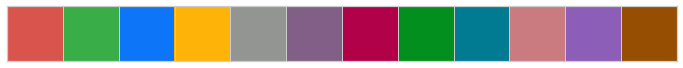

In [11]:
colors = ["pale red","medium green",
          "deep sky blue", "amber", "grey",  "dusty purple",
          "raspberry","emerald green","ocean","dirty pink",
         "deep lavender","warm brown"]
palette = sns.xkcd_palette(colors)
sns.palplot(palette)

In [12]:
project = signac.get_project(fn_projects['m'])
ii =0 
for job in project.find_jobs():
    if 'benchmark' in job.document:
    # print(job.document)
        for p in job.document.benchmark:
            if p['mean'] < 4*p['stdev']:
                # print(job.sp.name,job.sp.representation.compute_gradients, job.sp.representation.optimization_args , job.sp.representation.radial_basis, job.document.elapsed_mean ,job.document.elapsed_std)

                # data = fromjson(job.fn('in_ri_cpp.json'))
                print(p)
                ii += 1

{'tag': 'NL', 'mean': 0.13942439230158926, 'stdev': 0.07527436932510582, 'min': 0.09956264076754451, 'max': 0.289946551900357, 'samples': [0.289946551900357, 0.10403520287945867, 0.10176987666636705, 0.10180768929421902, 0.09956264076754451], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'rep with grad', 'mean': 20.09589856332168, 'stdev': 10.906593353394818, 'min': 9.03977928776294, 'max': 34.7671589339152, 'samples': [10.010685247834772, 9.03977928776294, 34.7671589339152, 31.53589639486745, 15.12597295222804], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred energy', 'mean': 0.3147685560397804, 'stdev': 0.1524762619766814, 'min': 0.1633570217527449, 'max': 0.5013605090789497, 'samples': [0.1644122707657516, 0.1633570217527449, 0.5013605090789497, 0.49331782618537545, 0.25139515241608024], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred forces', 'mean': 4.3985015179030595, 'stdev': 8.796654509988258, 'min': 0.00016441196203231812, 'max': 21.9918105378747, 'samples': [0.00017591891810297966, 

{'tag': 'pred energy', 'mean': 0.00012861322611570358, 'stdev': 3.298918598087844e-05, 'min': 0.0001023109070956707, 'max': 0.00019055185839533806, 'samples': [0.00019055185839533806, 0.0001023109070956707, 0.00011370889842510223, 0.00010281708091497421, 0.0001336773857474327], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'NL', 'mean': 0.20403070449829103, 'stdev': 0.19610967344533048, 'min': 0.10336490301415324, 'max': 0.5961727988906205, 'samples': [0.11353040765970945, 0.10345585783943534, 0.5961727988906205, 0.10336490301415324, 0.10362955508753657], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'pred forces', 'mean': 8.99193012509495, 'stdev': 4.505914821960402, 'min': 0.00019005266949534416, 'max': 11.544320496264845, 'samples': [11.255721402354538, 10.687369717750698, 11.544320496264845, 11.472048956435174, 0.00019005266949534416], 'name': 'qm9', 'n_atoms': 14418}
{'tag': 'rep with grad', 'mean': 12.914317135512828, 'stdev': 3.9934311118224053, 'min': 7.931097341235727, 'max': 17.3200757

In [13]:
ii

54

# m0

{'Nselect': {'14': 5000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 100}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 9000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 200}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 2000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 500}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 1000}, 'act_on': 'sample per species', 'seed': 10}


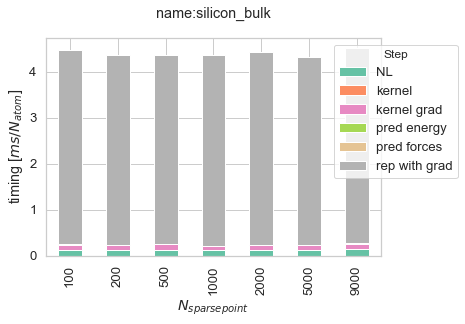

In [39]:
project = signac.get_project(fn_projects['m0'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

{'Nselect': 650, 'act_on': 'feature', 'seed': 10}
{'Nselect': 130, 'act_on': 'feature', 'seed': 10}
{'Nselect': 13, 'act_on': 'feature', 'seed': 10}
{'Nselect': None, 'act_on': 'feature', 'seed': 10}
{'Nselect': 260, 'act_on': 'feature', 'seed': 10}
{'Nselect': 909, 'act_on': 'feature', 'seed': 10}
{'Nselect': 65, 'act_on': 'feature', 'seed': 10}
{'Nselect': 1300, 'act_on': 'feature', 'seed': 10}


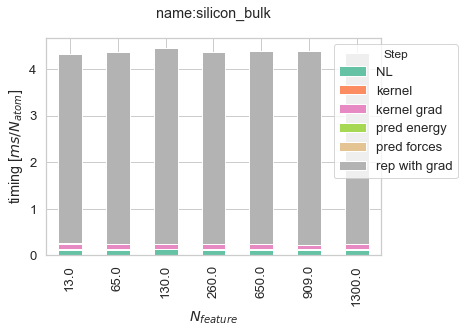

In [42]:
project = signac.get_project(fn_projects['m0'])
qry = {'sparse_point_subselection.Nselect':{'14':9000}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = job.sp.feature_subselection.Nselect
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [55]:
df

Empty DataFrame
Columns: []
Index: []

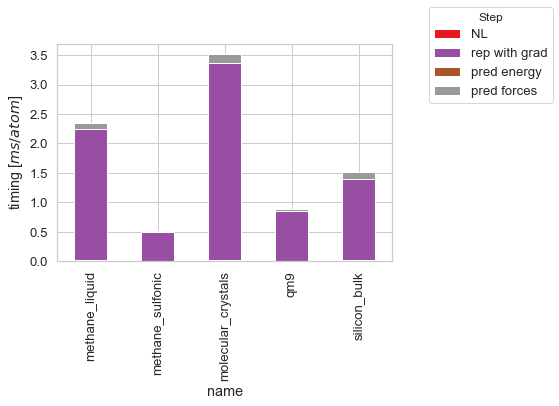

In [29]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

In [31]:
df

tag       mean     stdev        min        max  \
0              NL   0.030295  0.007503   0.026039   0.045268   
1   rep with grad   3.586335  0.004367   3.581278   3.592200   
2     pred energy   0.014127  0.003205   0.007867   0.016824   
3     pred forces   0.166740  0.001369   0.164954   0.168651   
4              NL   0.025909  0.009910   0.016754   0.043692   
5   rep with grad   4.713388  0.055042   4.652424   4.790574   
6     pred energy   0.004488  0.001154   0.002200   0.005353   
7     pred forces   0.204184  0.007742   0.189233   0.211397   
8              NL   0.031890  0.011908   0.018770   0.046983   
9   rep with grad   1.994908  0.010778   1.984874   2.012771   
10    pred energy   0.008220  0.003911   0.003343   0.011755   
11    pred forces   0.185489  0.015232   0.164711   0.199956   
12             NL   0.084179  0.012183   0.077103   0.108467   
13  rep with grad  12.265715  1.001687  11.417741  13.561481   
14    pred energy   0.016109  0.000199   0.015784   0.016409   
15    pred forces   0.458060  0.015608   0.438886   0.475828   
16             NL   0.058745  0.009650   0.047998   0.076856   
17  rep with grad   8.100166  0.080823   8.040804   8.256289   
18    pred energy   0.012178  0.003701   0.004795   0.014467   
19    pred forces   0.407666  0.014536   0.380598   0.419724   

                                              samples                name  \
0   [0.04526832397095859, 0.027476116083562374, 0....    methane_sulfonic   
1   [3.592199904844165, 3.590311781037599, 3.58595...    methane_sulfonic   
2   [0.01593140698969364, 0.014805778861045837, 0....    methane_sulfonic   
3   [0.16495355498045683, 0.1664204818662256, 0.16...    methane_sulfonic   
4   [0.02829388715326786, 0.023910989984869957, 0....  molecular_crystals   
5   [4.652424187166616, 4.7670378889888525, 4.6872...  molecular_crystals   
6   [0.004978286102414131, 0.002200069837272167, 0...  molecular_crystals   
7   [0.2051214079838246, 0.20727997599169612, 0.21...  molecular_crystals   
8   [0.02981878793798387, 0.04428557911887765, 0.0...        silicon_bulk   
9   [2.0014293321873993, 2.012770886067301, 1.9848...        silicon_bulk   
10  [0.003532694885507226, 0.011415062006562948, 0...        silicon_bulk   
11  [0.19465699000284076, 0.169381600106135, 0.198...        silicon_bulk   
12  [0.0797273840289563, 0.07847605901770294, 0.10...                 qm9   
13  [13.420780966058373, 13.561481471173465, 11.46...                 qm9   
14  [0.016074665123596787, 0.01640906697139144, 0....                 qm9   
15  [0.4397061460185796, 0.4690961211454123, 0.438...                 qm9   
16  [0.04799841297790408, 0.054664759896695614, 0....      methane_liquid   
17  [8.098170606885105, 8.064386034850031, 8.04118...      methane_liquid   
18  [0.01367178582586348, 0.014049289980903268, 0....      methane_liquid   
19  [0.4194098610896617, 0.4134932339657098, 0.380...      methane_liquid   

    n_atoms  mean [ms/atom]  std [ms/atom]  
0      7371        0.004110       0.000509  
1      7371        0.486547       0.000296  
2      7371        0.001917       0.000217  
3      7371        0.022621       0.000093  
4      1408        0.018401       0.003519  
5      1408        3.347577       0.019546  
6      1408        0.003187       0.000410  
7      1408        0.145017       0.002749  
8      1458        0.021873       0.004084  
9      1458        1.368250       0.003696  
10     1458        0.005638       0.001341  
11     1458        0.127222       0.005224  
12    14418        0.005838       0.000422  
13    14418        0.850722       0.034737  
14    14418        0.001117       0.000007  
15    14418        0.031770       0.000541  
16     3645        0.016117       0.001324  
17     3645        2.222268       0.011087  
18     3645        0.003341       0.000508  
19     3645        0.111842       0.001994

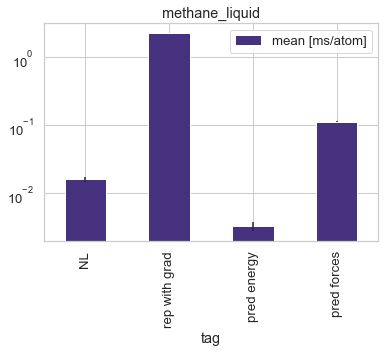

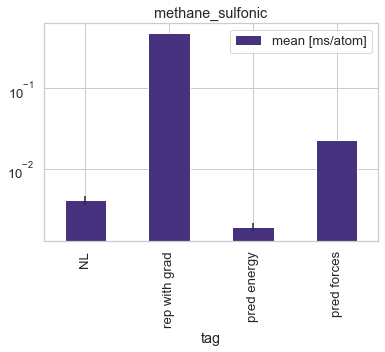

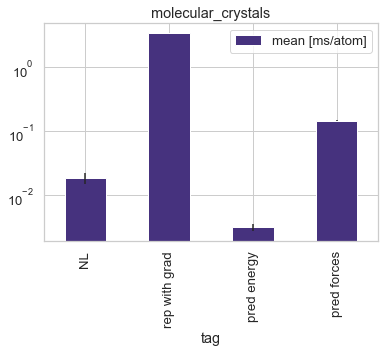

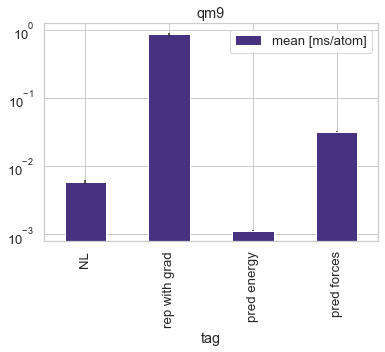

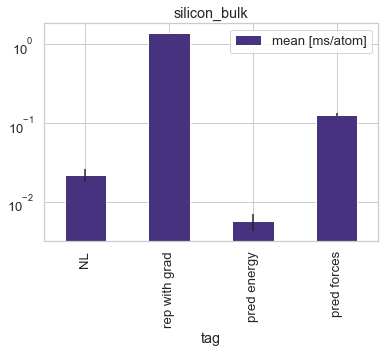

In [32]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=True)

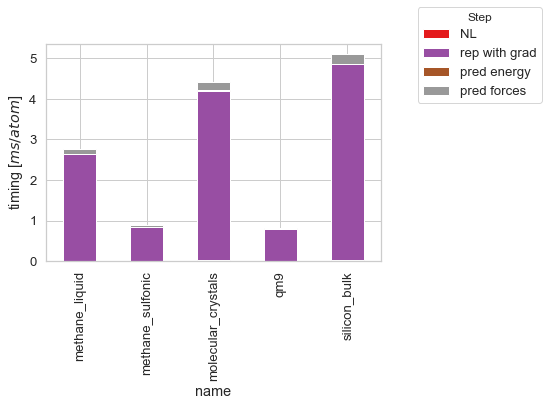

In [28]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

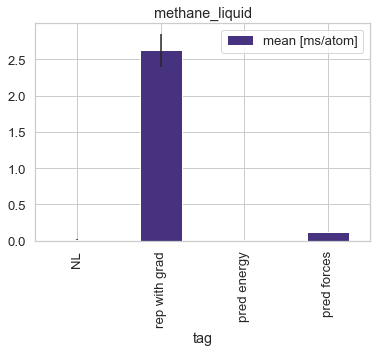

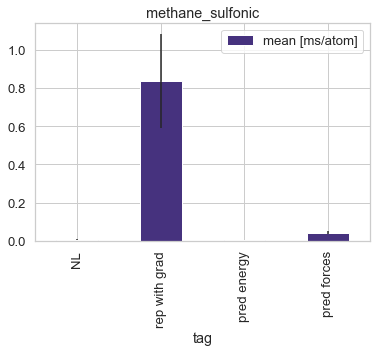

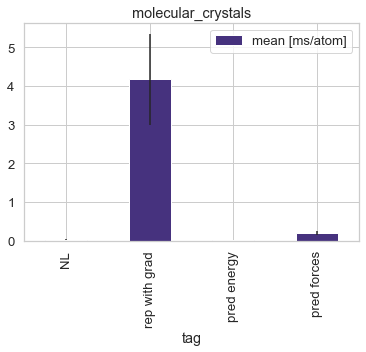

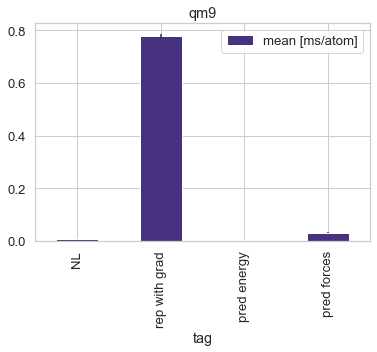

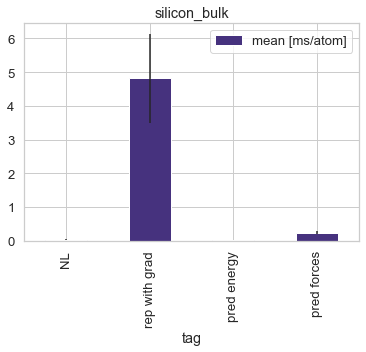

In [27]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=False)

# all_2

In [11]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None}}
for job in project.find_jobs(qry):
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-2]
aa

{'molecular_crystals': 2600,
 'qm9': 9750,
 'methane_liquid': 1950,
 'silicon_bulk': 650,
 'methane_sulfonic': 6500}

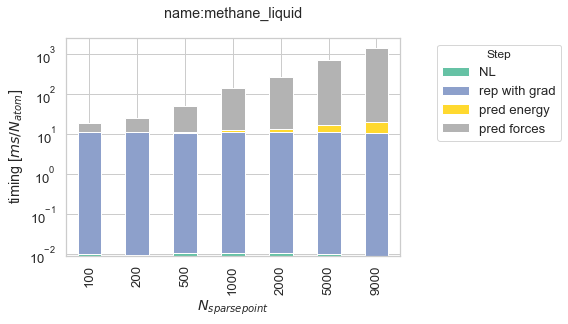

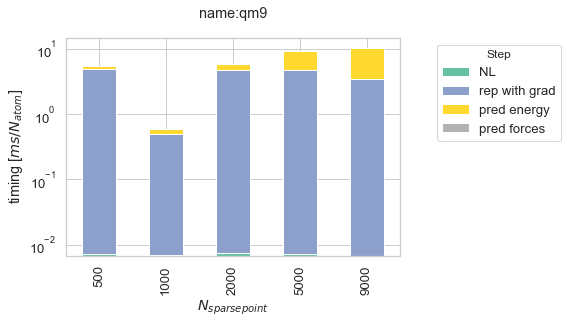

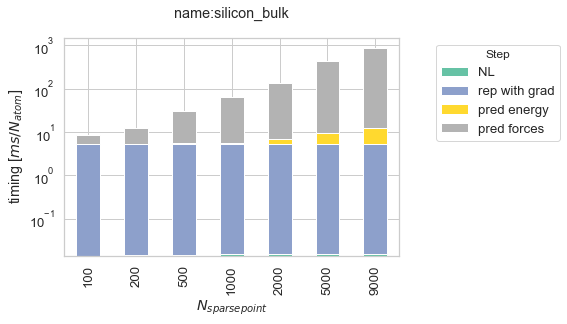

In [14]:

project = signac.get_project(fn_projects['m'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 'representation.normalize':{'$eq':True}}
aa = []
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.yscale('log')
    # fname = 'model-bar_stack-{}.png'.format(name)
    # plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [15]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None}}
for job in project.find_jobs(qry):
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-1]
aa

{'molecular_crystals': 6500,
 'qm9': 13650,
 'methane_liquid': 2730,
 'silicon_bulk': 909,
 'methane_sulfonic': 9100}

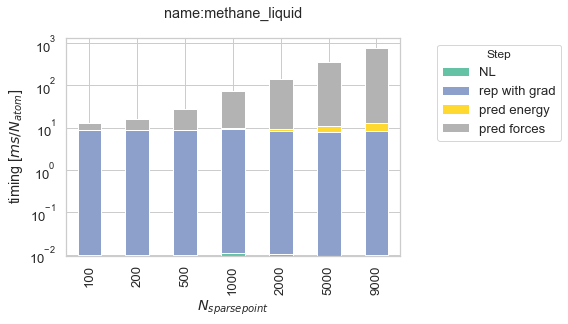

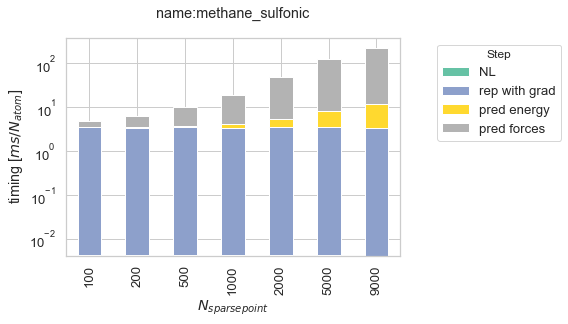

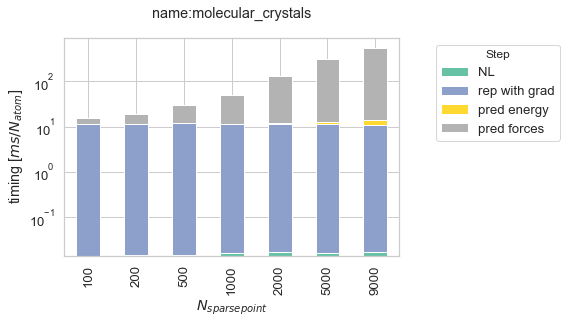

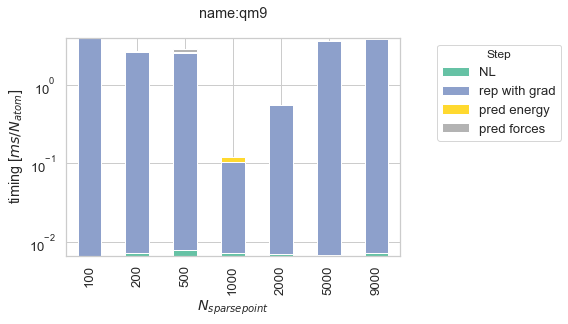

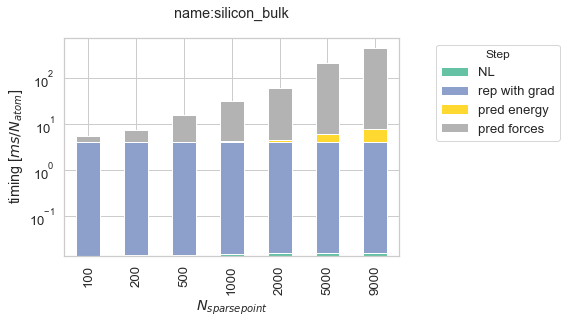

In [16]:

project = signac.get_project(fn_projects['m'])
qry = {'representation.normalize':{'$eq':True}}
aa = []
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']
# with 50% features
select = {'methane_liquid': 1950, 'molecular_crystals': 2600, 'methane_sulfonic': 6500, 'qm9': 9750, 'silicon_bulk': 650}
for job in project.find_jobs(qry):
    if select[job.sp.name] != job.sp.feature_subselection.Nselect:
        continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.yscale('log')
    fname = 'model-sparse_point-{}-nfeat_{}.png'.format(name,select[name])
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
aa= []
for job in project.find_jobs():
    # print(job.sp.name, np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
    aa.append(np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
np.unique(aa)

array([ 100,  200,  500, 1000, 2000, 5000, 9000])

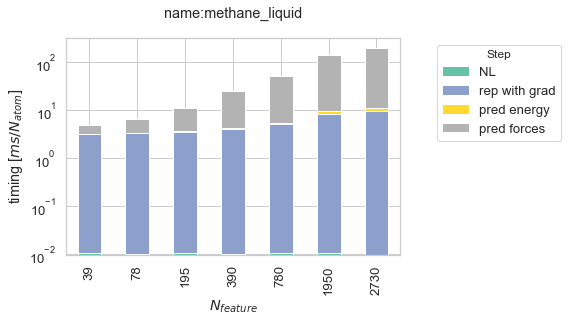

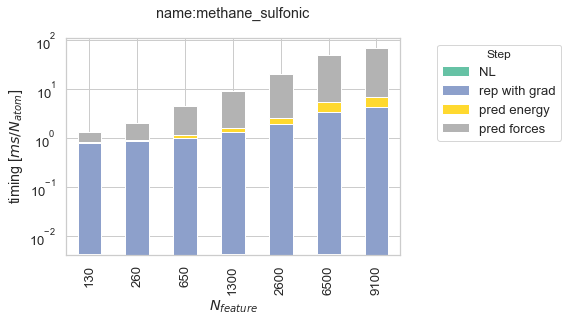

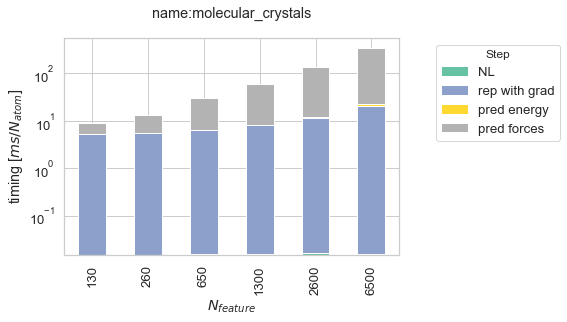

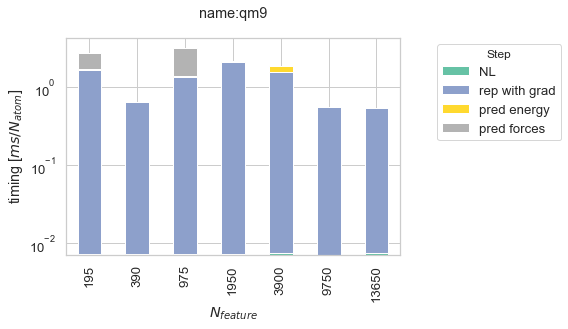

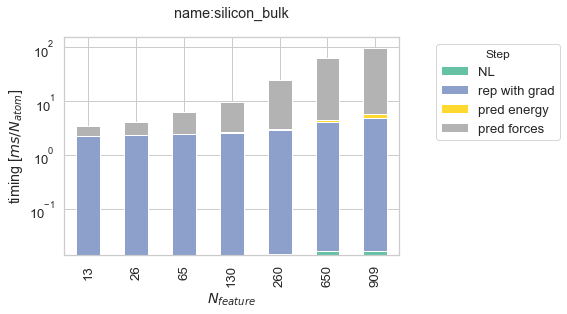

In [18]:
project = signac.get_project(fn_projects['m'])
qry = {'representation.normalize':{'$eq':True}, 'feature_subselection.Nselect':{'$ne':None}}
aa = []
n_sparse = 2000
order = ['NL', 'rep with grad', 'pred energy', 'pred forces']

for job in project.find_jobs(qry):
    if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
        continue
        
    # print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for name, df_ in df.groupby(['name']):
    df2 = df_.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join([k+':'+str(df_.iloc[0][k]) for k in title_values])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.yscale('log')
    fname = 'model-feature_sparsification-{}-nsparse_{}.png'.format(name,n_sparse)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [19]:
def plot_bar(df, title, x, y, yerr , row, col, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_bar, x, y, yerr, title)
    return g
def draw_bar(*args, **kwargs):
    data = kwargs.pop('data')
    data.plot(kind='bar', x=args[0], y=args[1], yerr=args[2],title=args[3], logy=True, ax=plt.gca())

In [18]:
project = signac.get_project(fn_projects['m'])
qry = {'feature_subselection.Nselect':{'$ne':None}}
aa = []
n_sparse = 2000
# with 50% features
select = {'methane_liquid': 1950, 'molecular_crystals': 2600, 'methane_sulfonic': 6500, 'qm9': 9750, 'silicon_bulk': 650}
for job in project.find_jobs(qry):
    # if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
    #     continue
    # if select[job.sp.name] != job.sp.feature_subselection.Nselect:
    #     continue
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)
    

methane_liquid


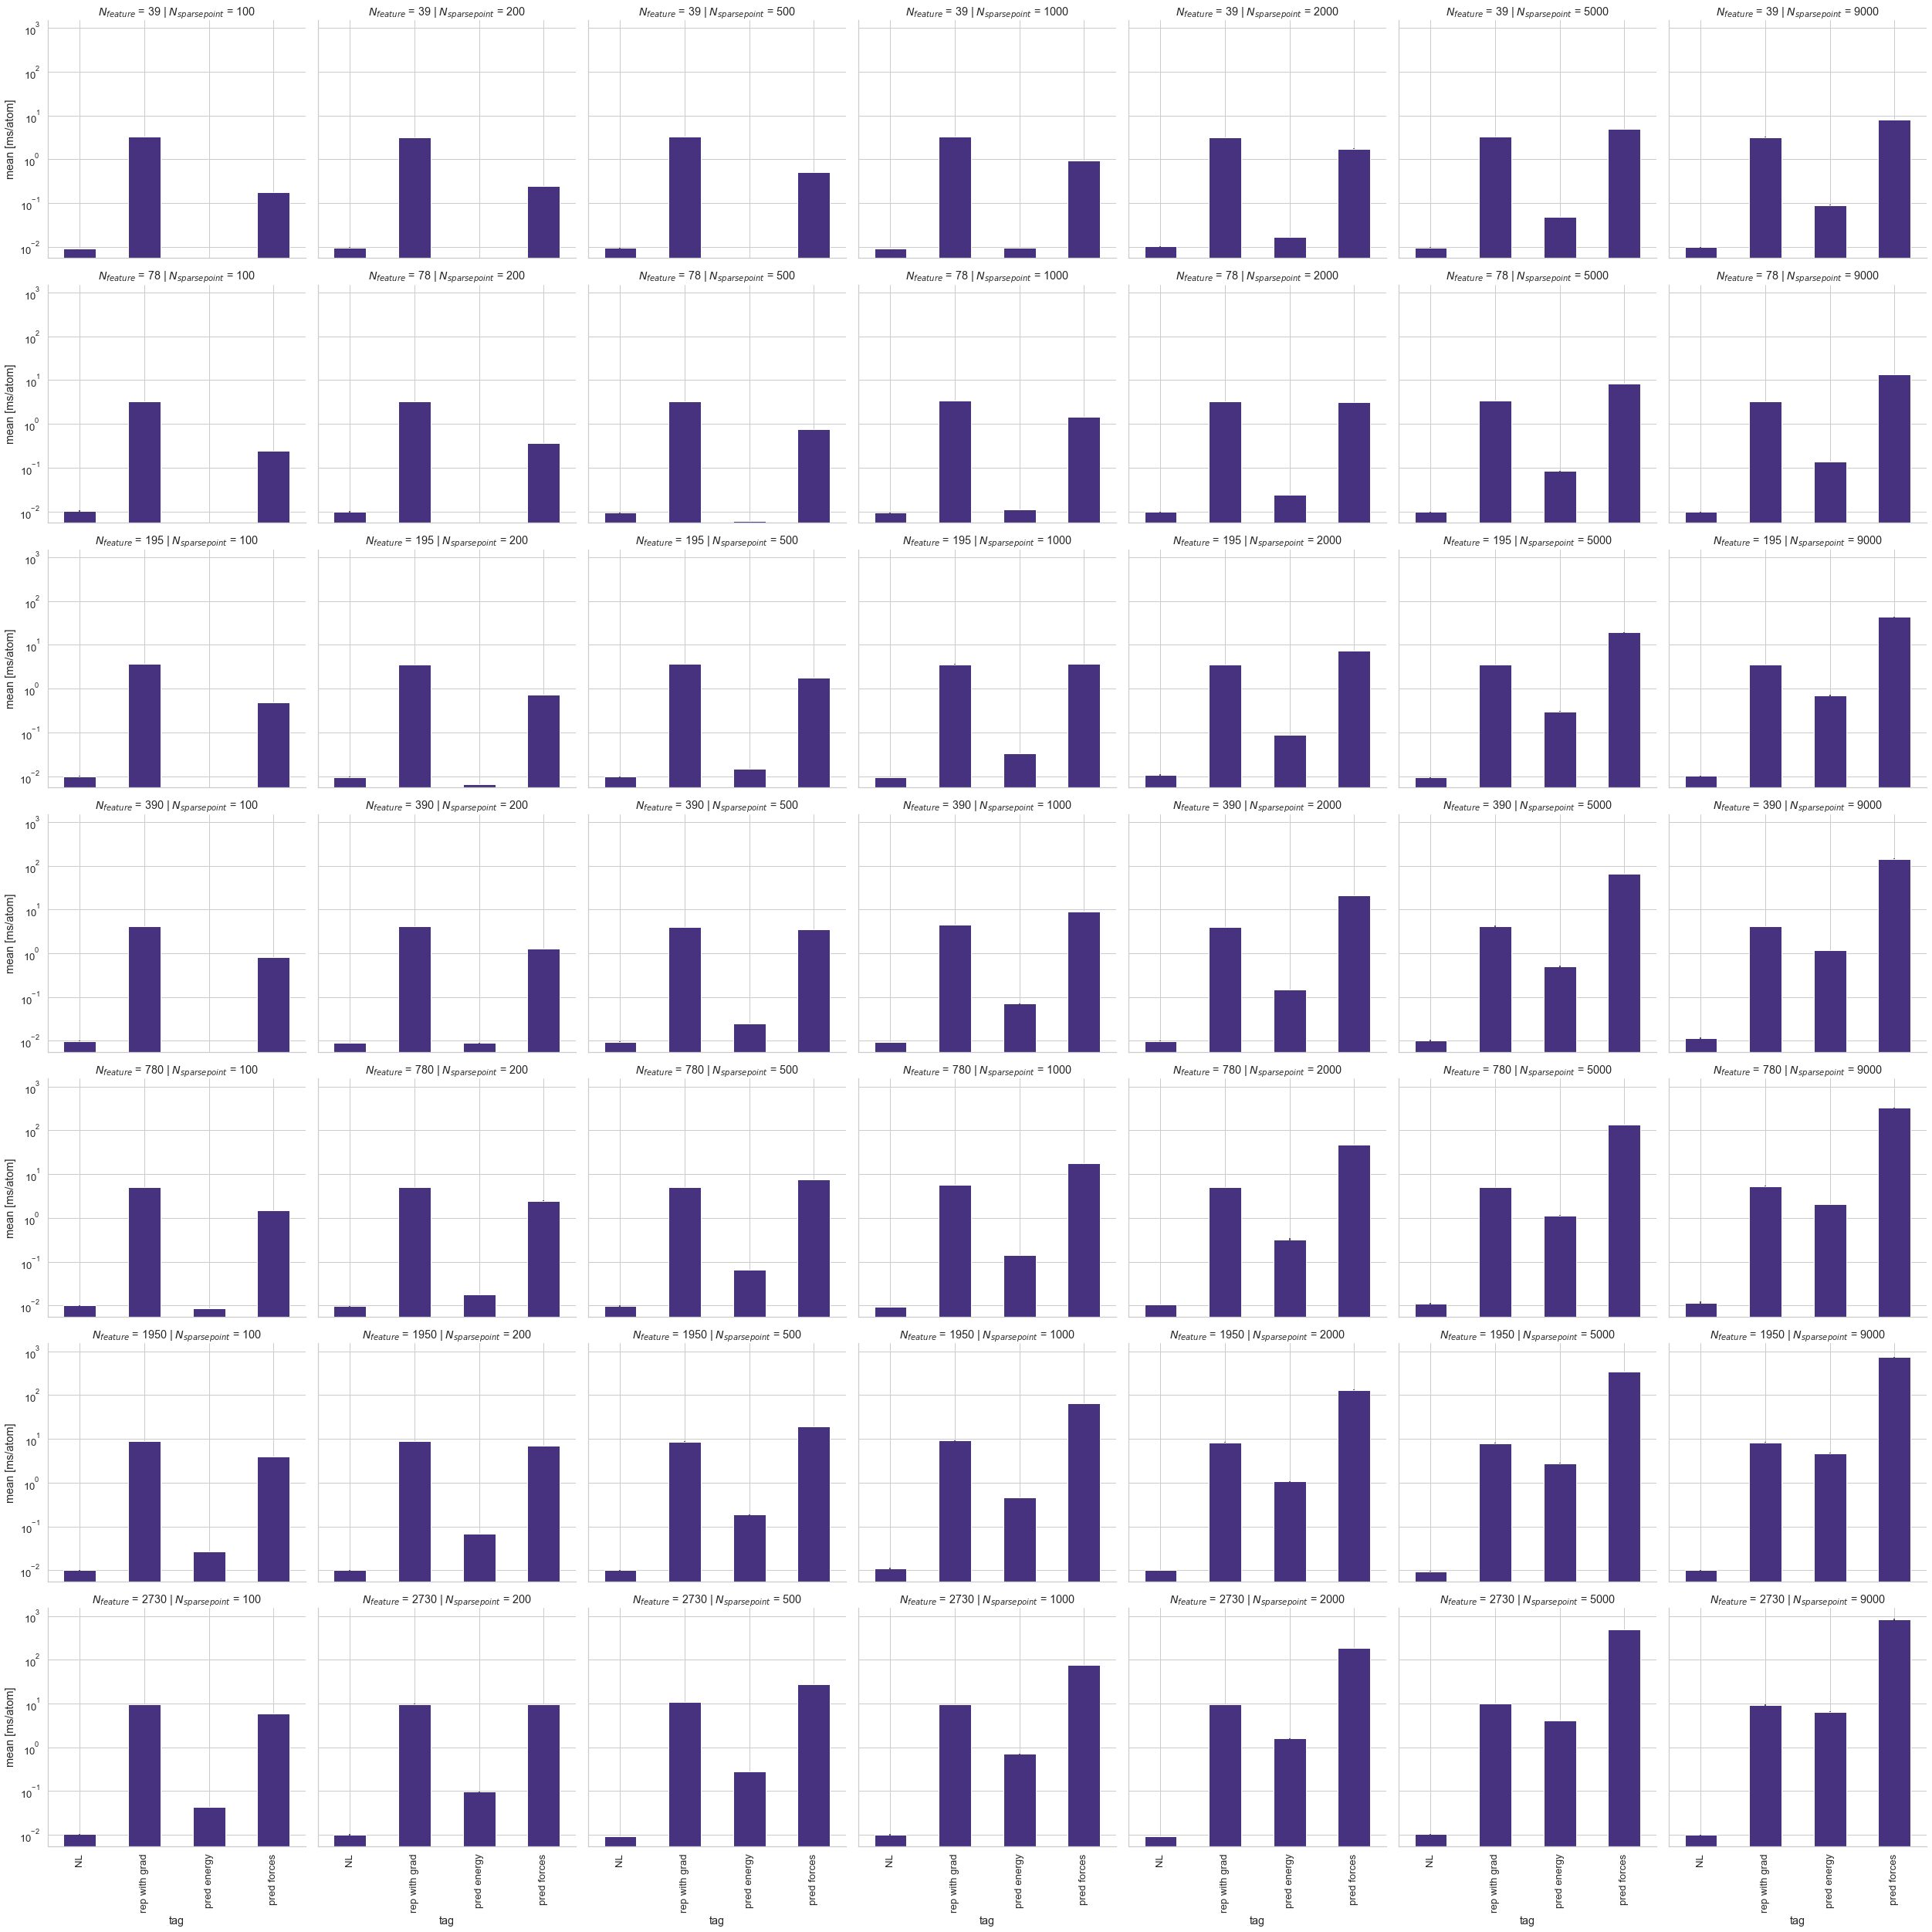

methane_sulfonic


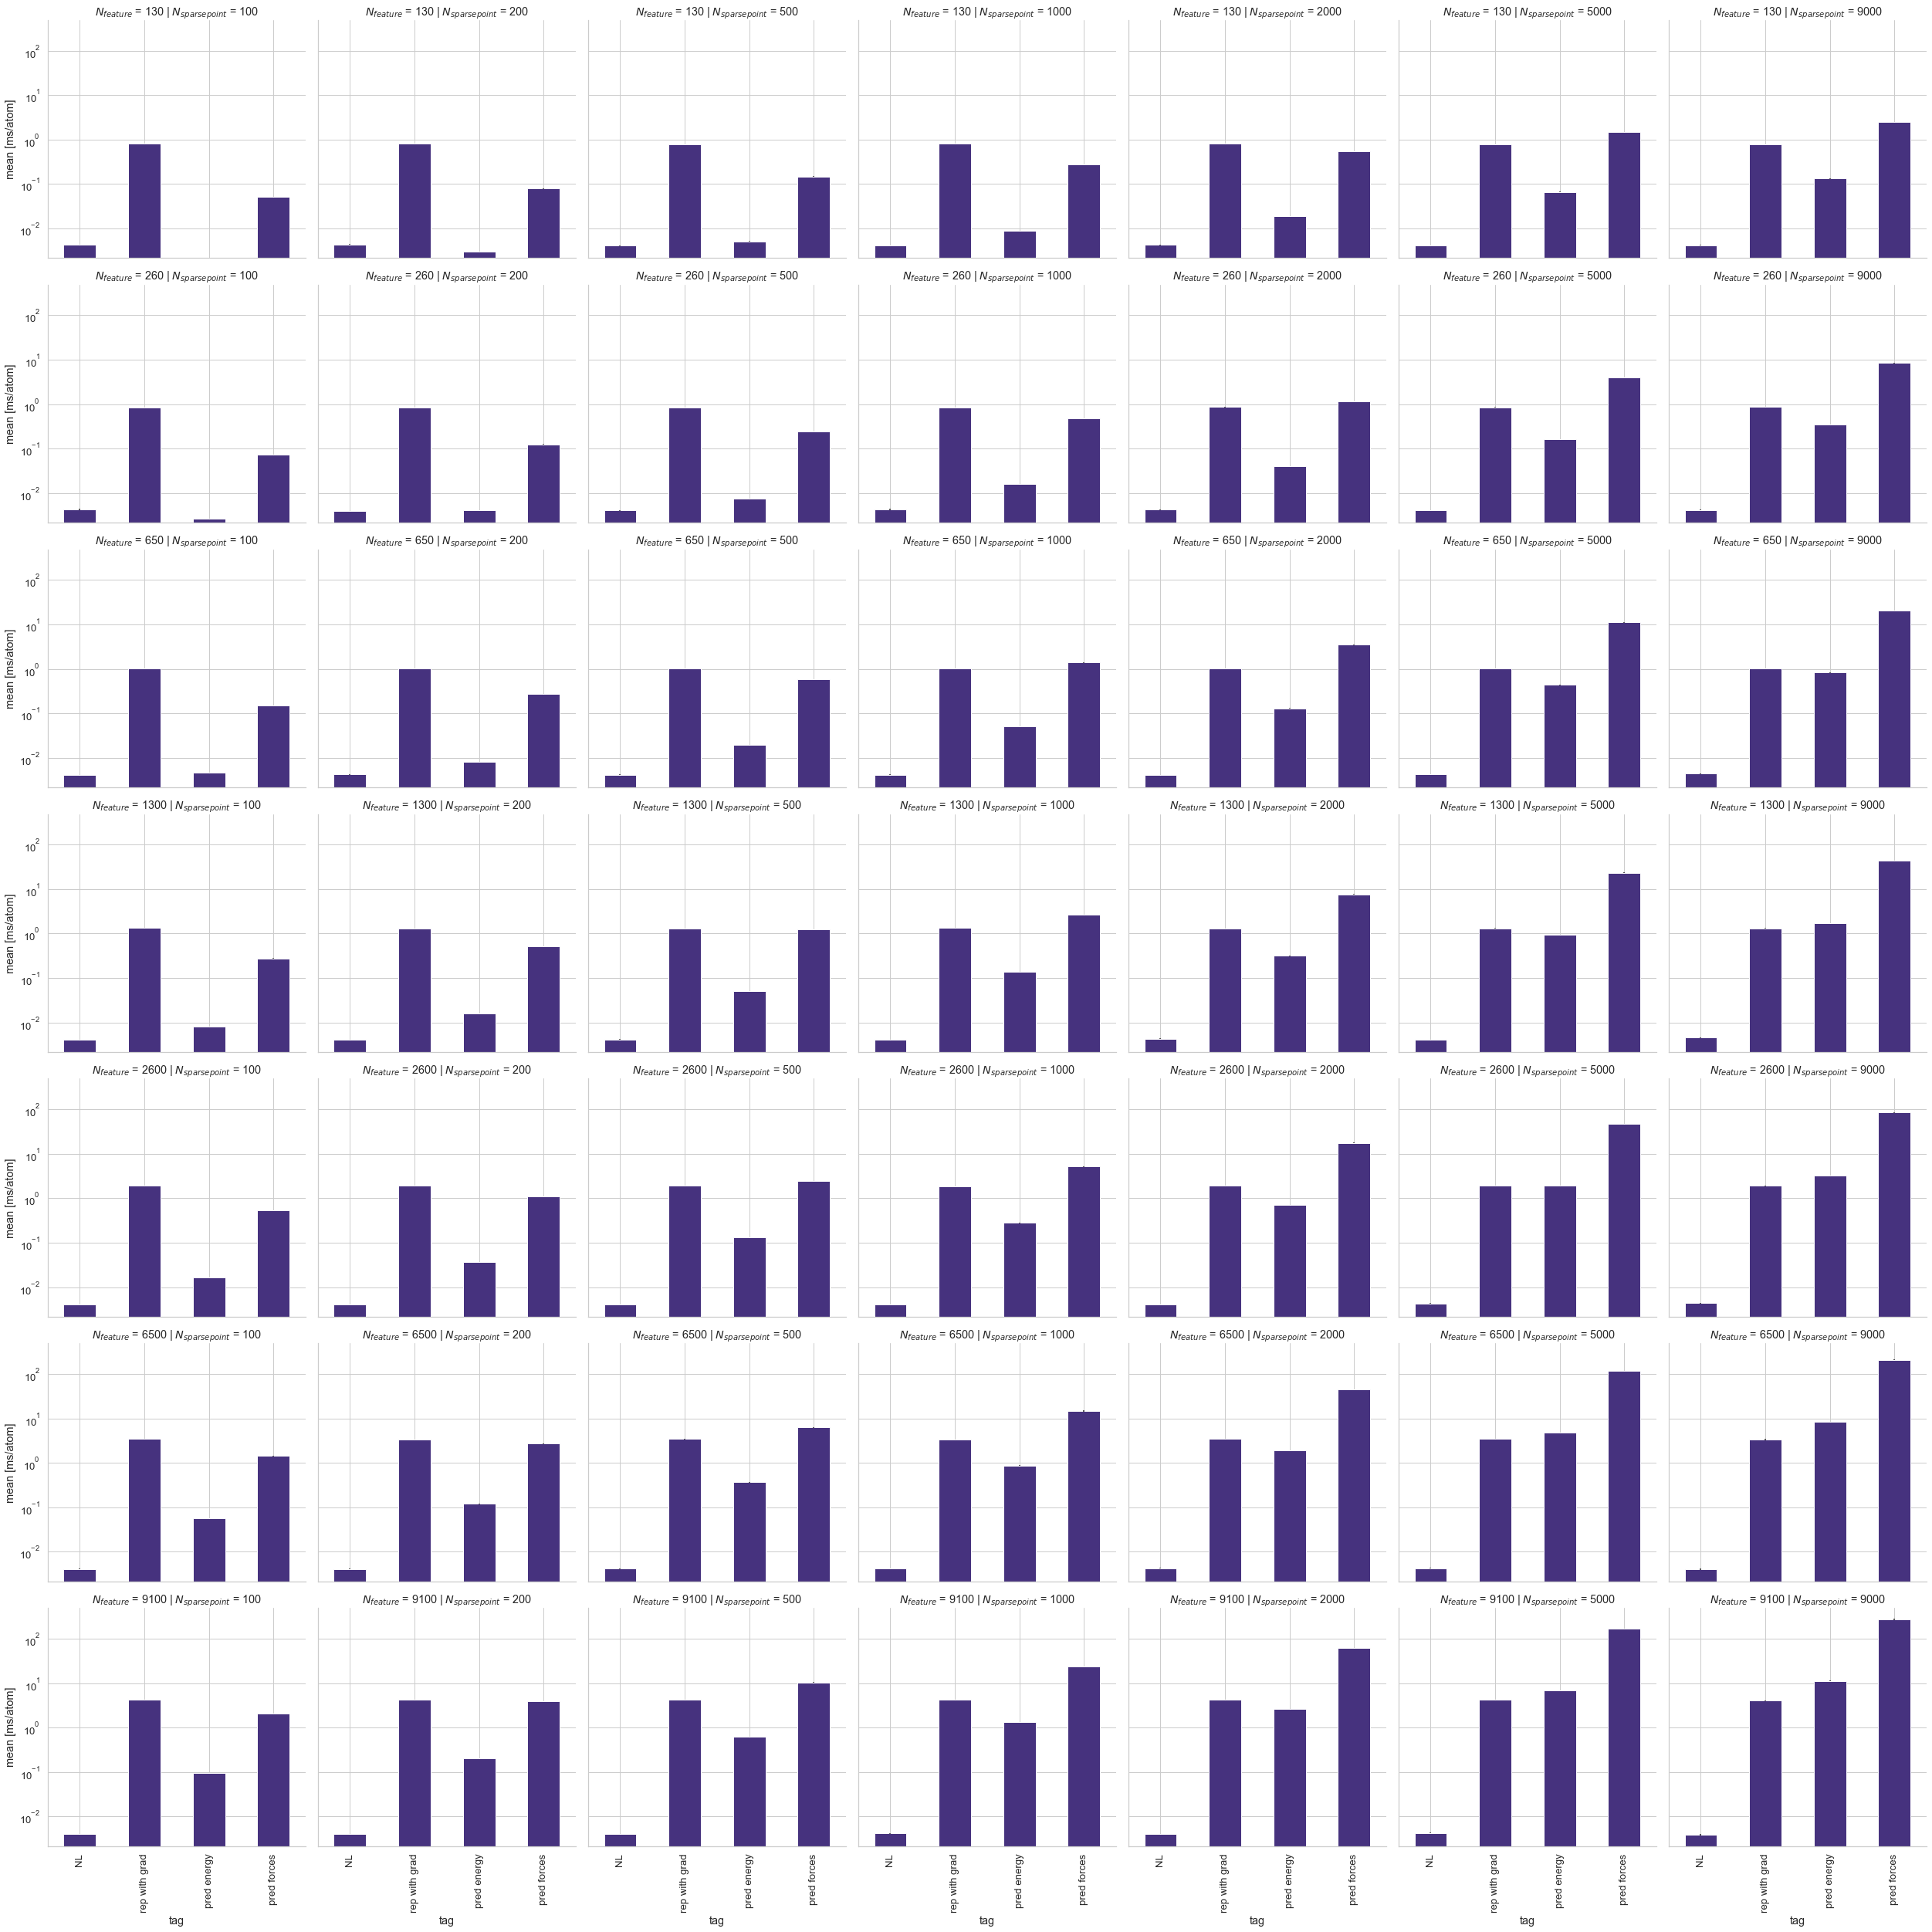

molecular_crystals


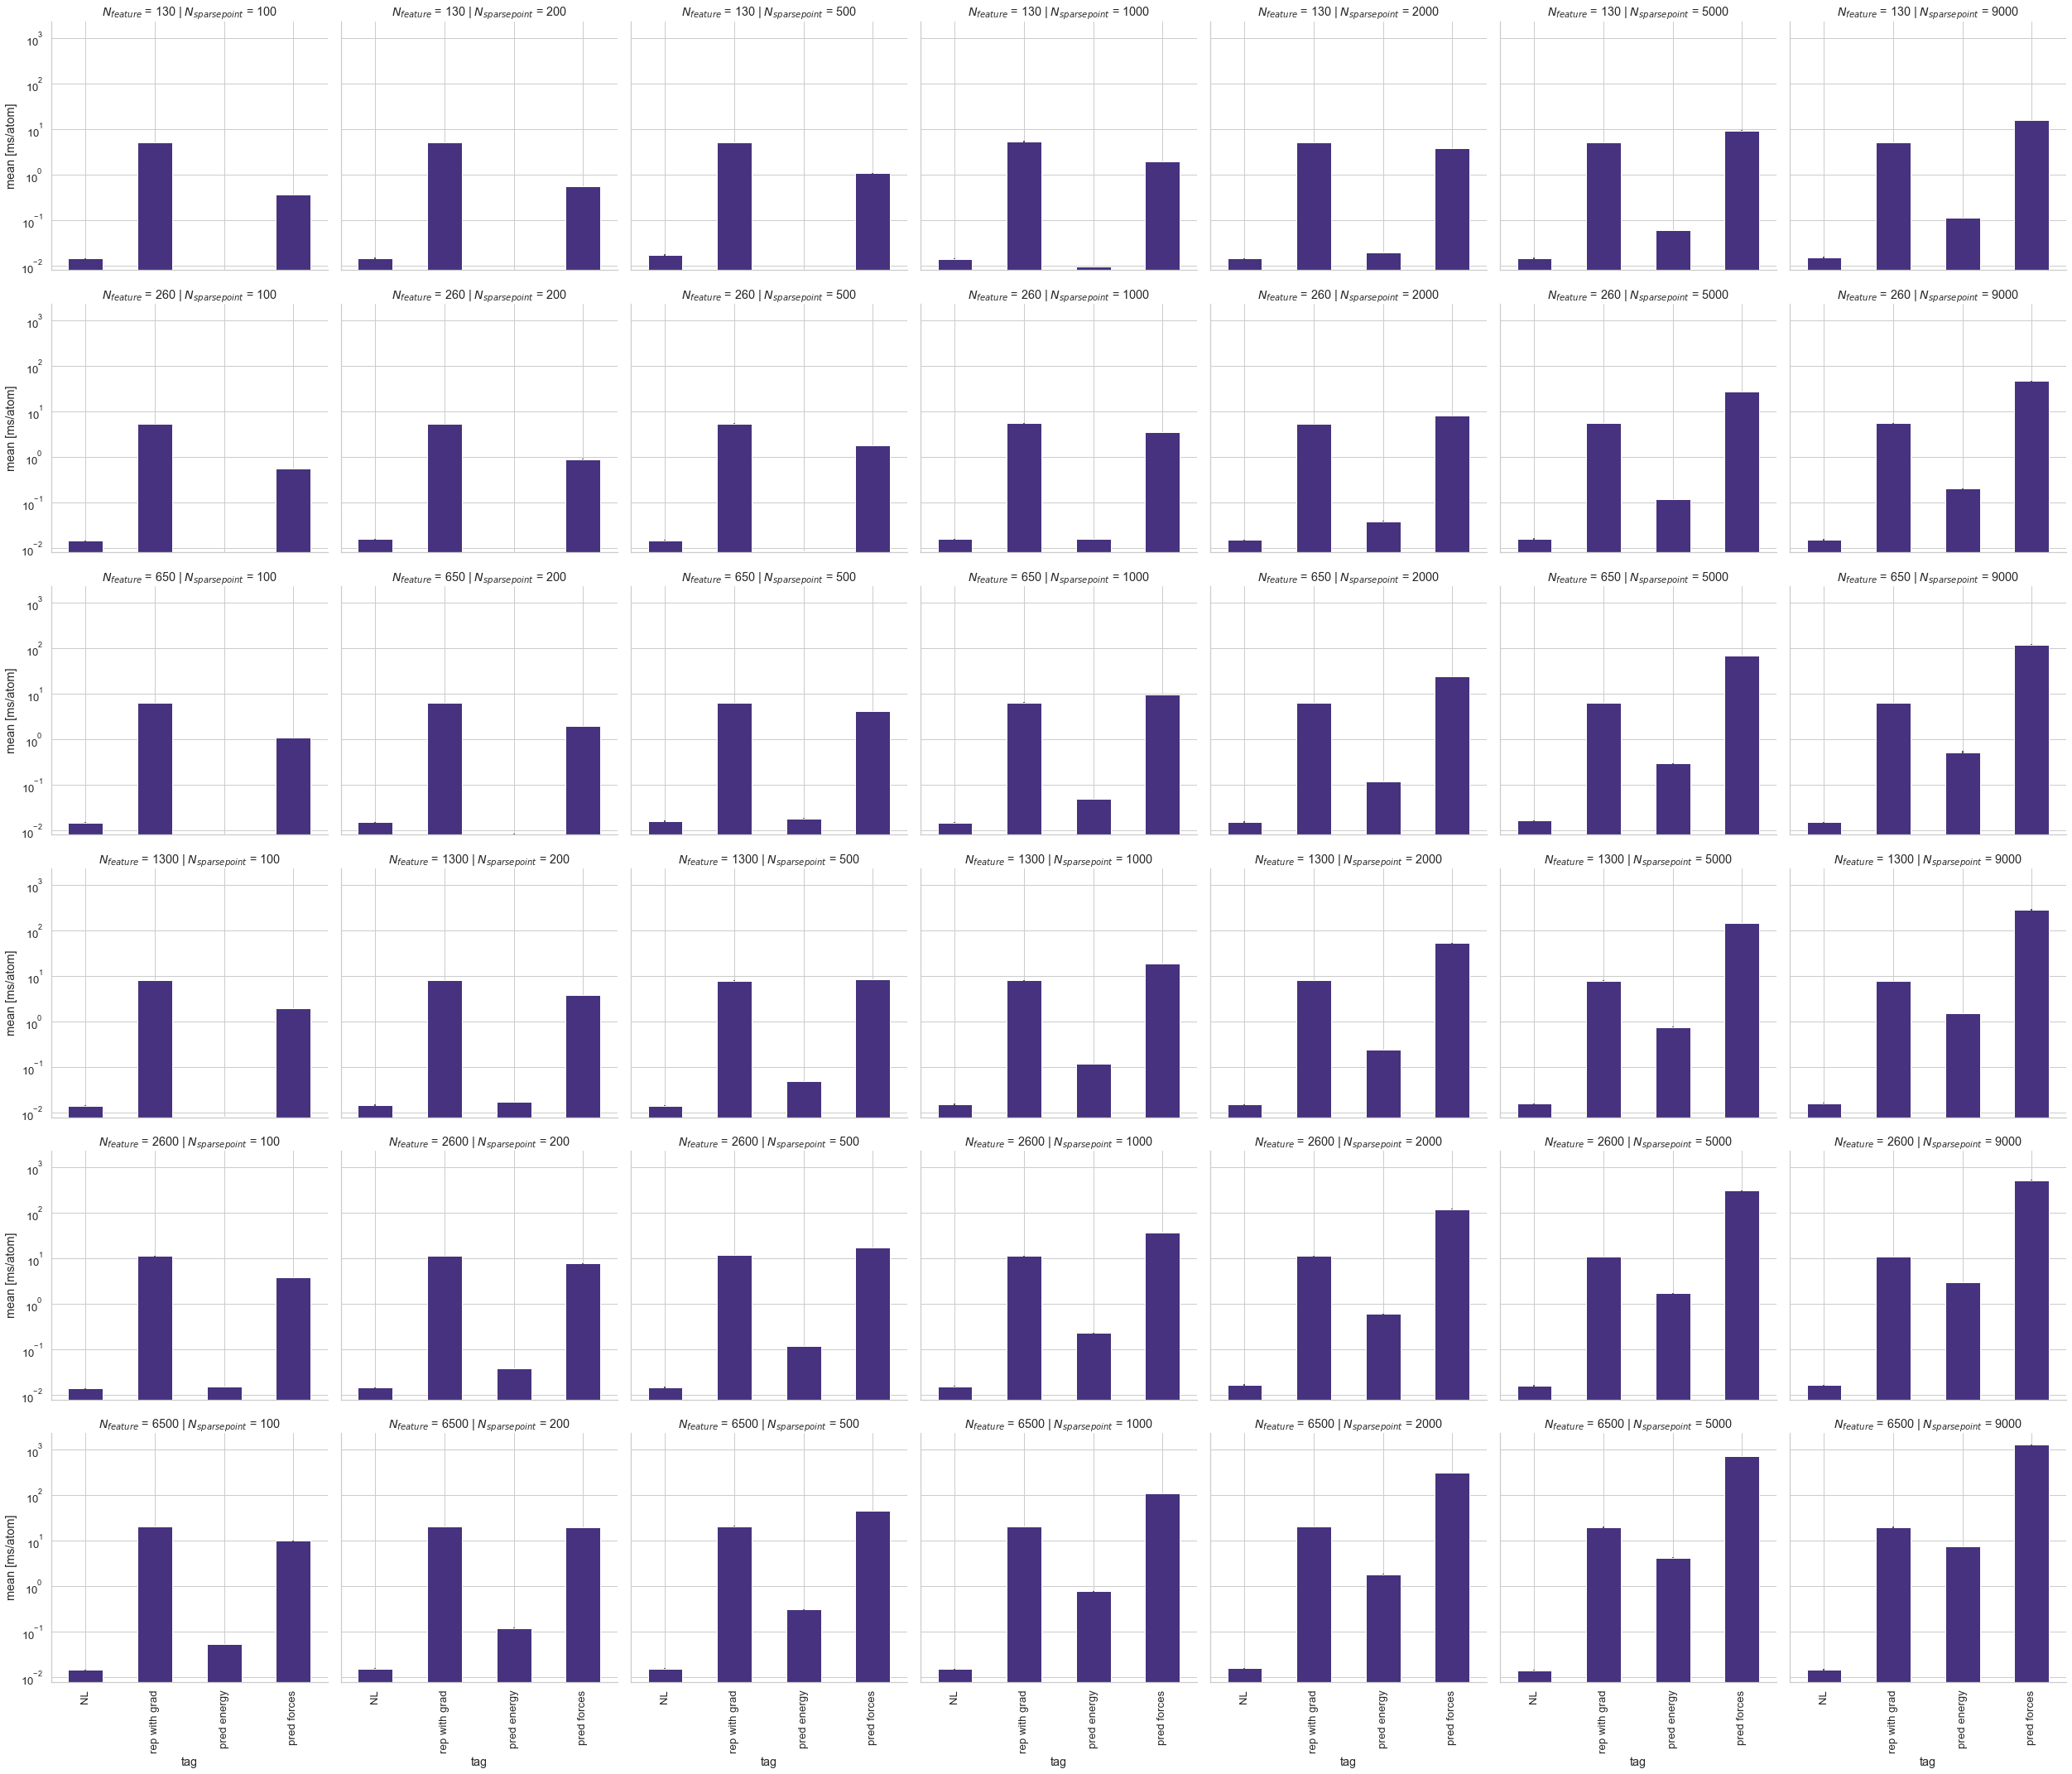

qm9


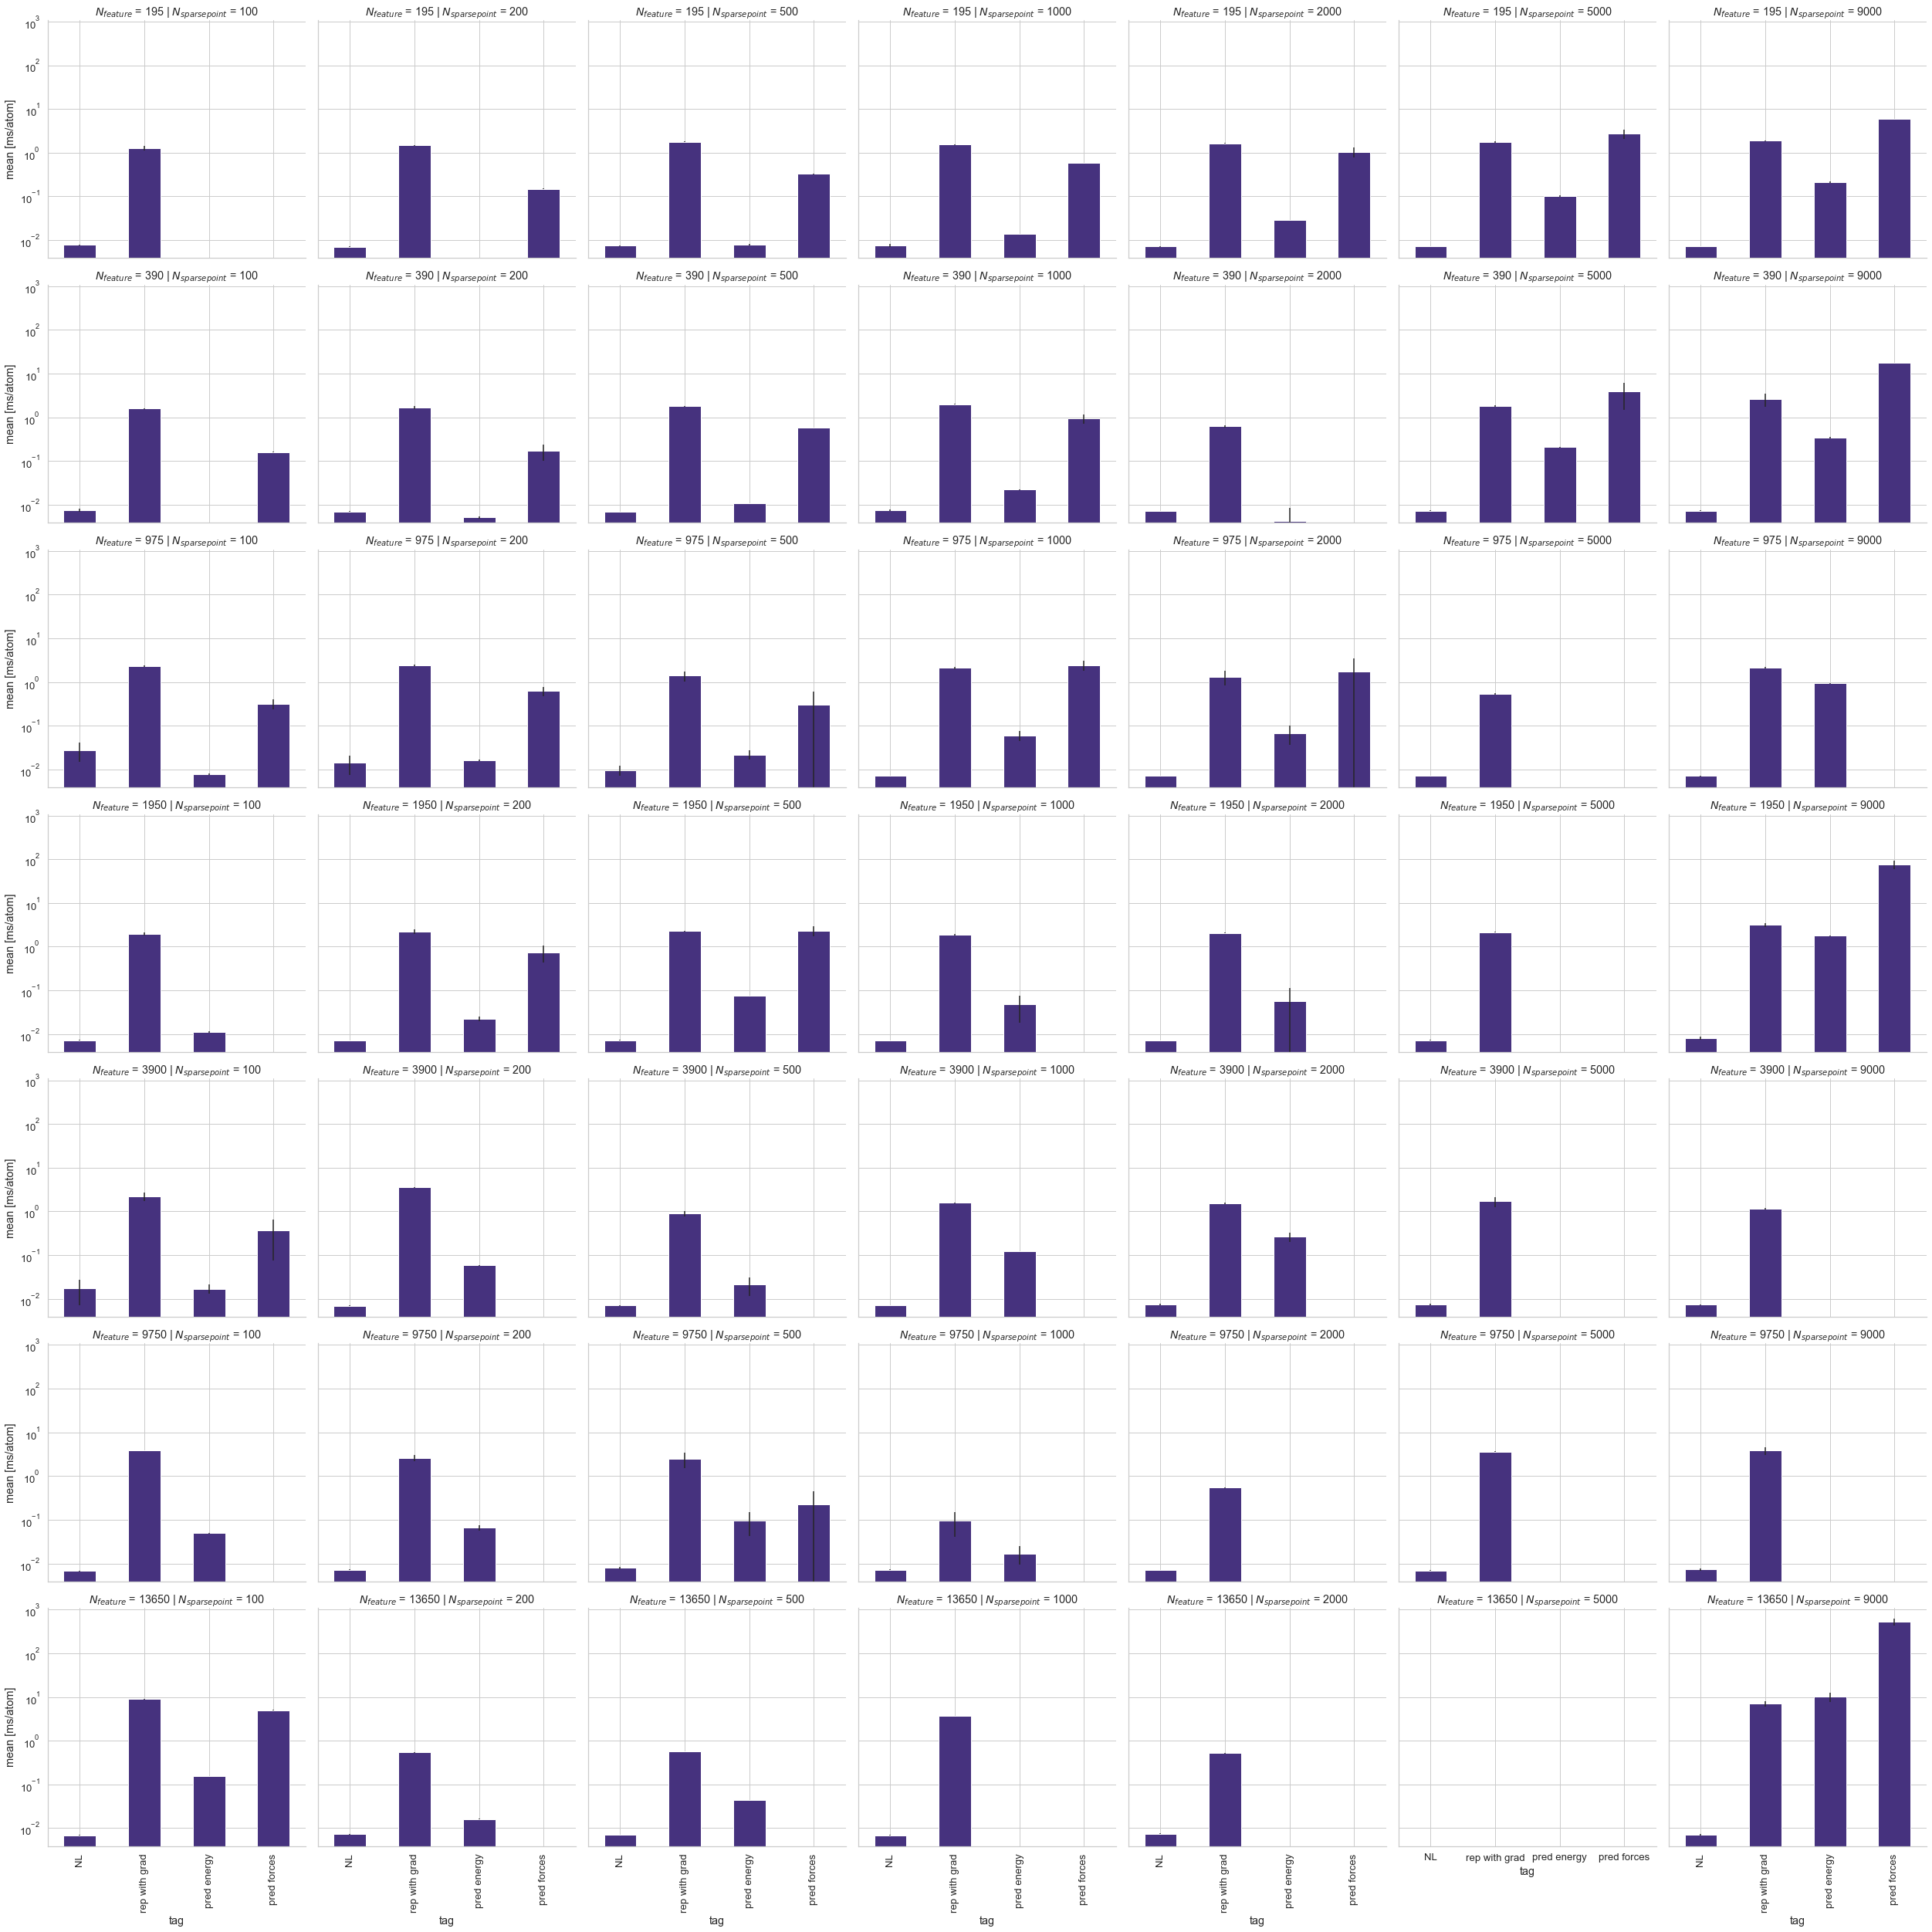

silicon_bulk


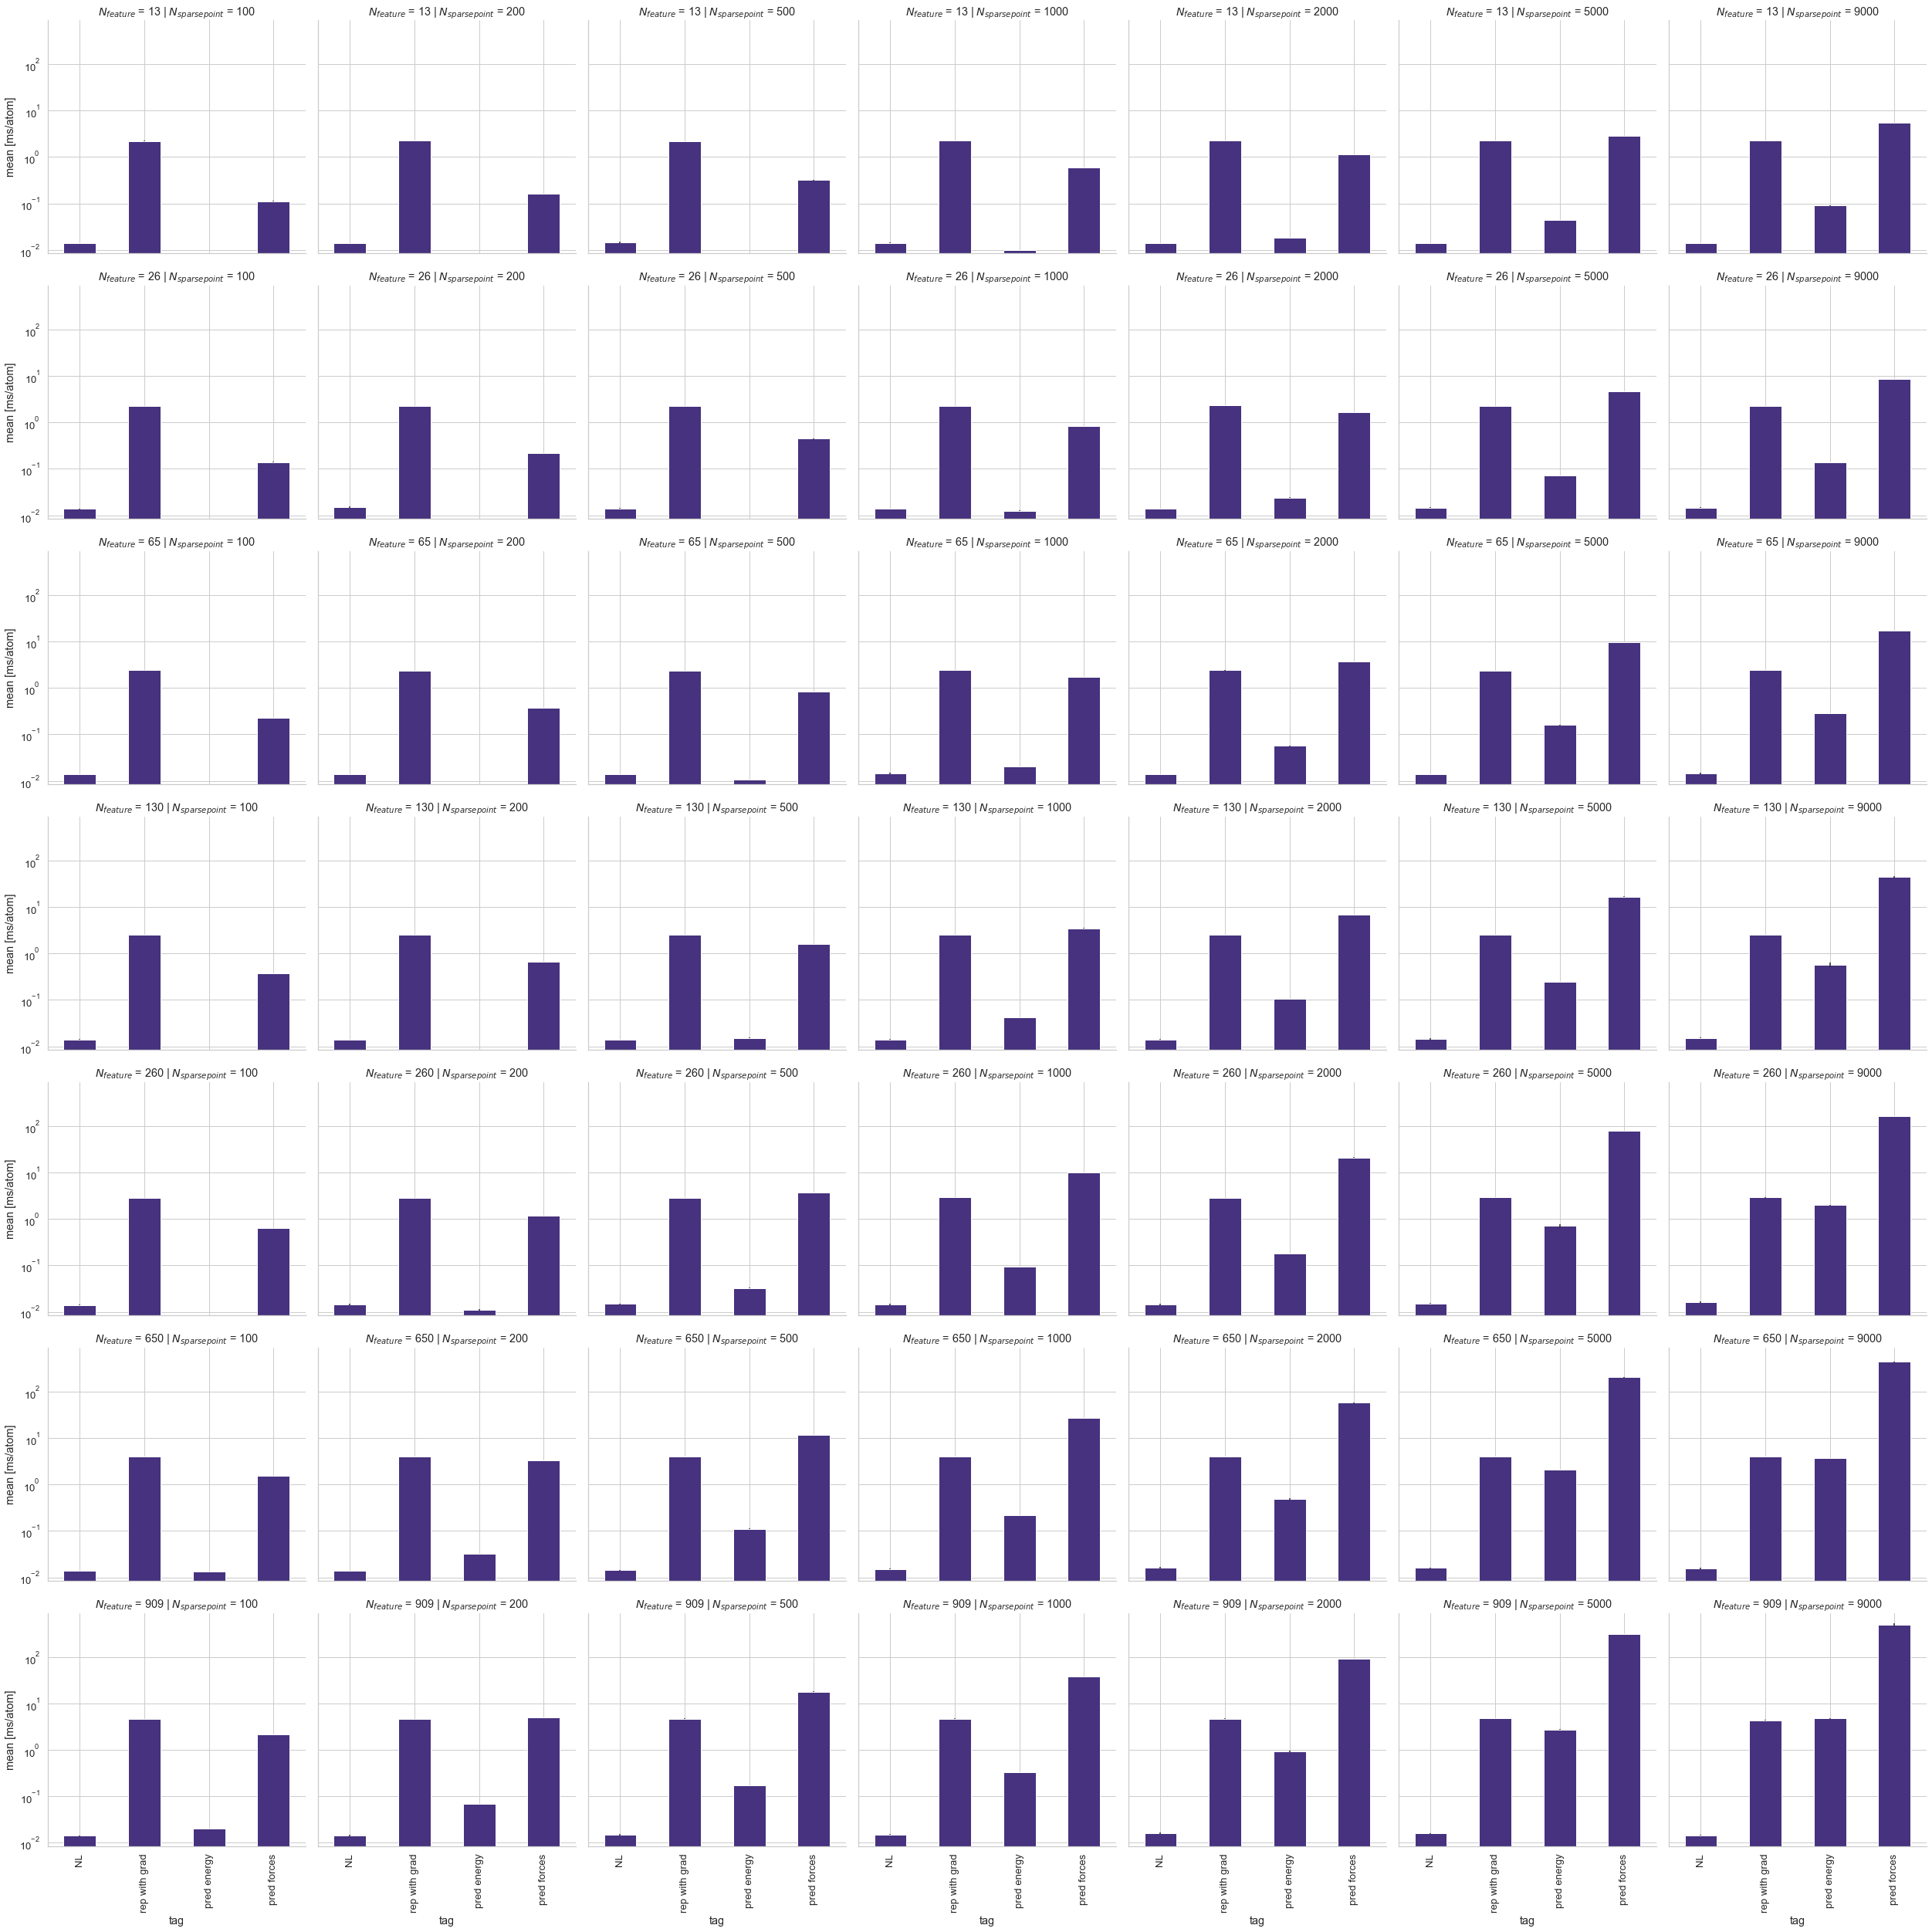

In [64]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)

for name,d in df.groupby('name'):
    print(name)
    plot_bar(d, x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name,
             col='$N_{sparse point}$',row='$N_{feature}$')
    plt.show()

In [19]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
def plot_contour(df, x, y, values , row, col, **kwargs):
    vmin=df[values].min()
    vmax=df[values].max()
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_heatmap, x, y, values, cmap=cmap, square=True, cbar=False,
                    vmin=vmin, vmax=vmax)
    # g.map(sns.heatmap, x, y, values, cmap=cmap, square=True, cbar_kws={'label': values})
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.25, 1))
    fig = g.fig
    fig.tight_layout(h_pad=1.5, w_pad=1.5)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.7])
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label= values)
    return g
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.sort_index('index',ascending=False) 
    sns.heatmap(d, **kwargs)

methane_liquid pred energy


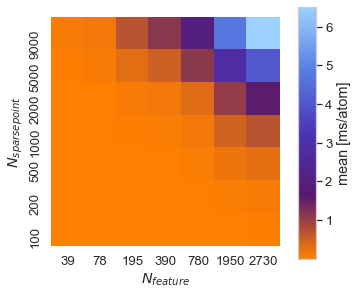

methane_liquid pred forces


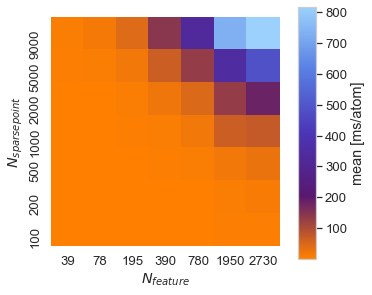

methane_liquid rep with grad


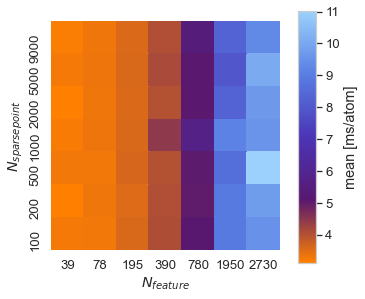

methane_sulfonic pred energy


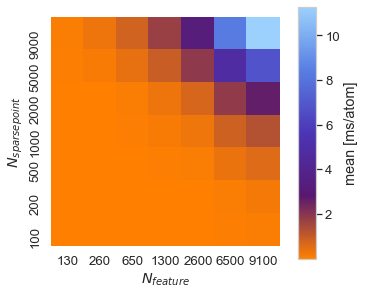

methane_sulfonic pred forces


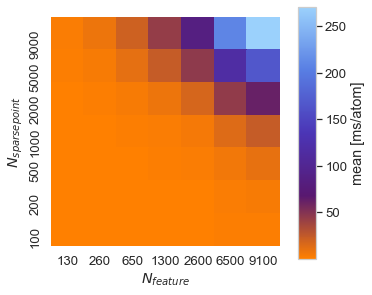

methane_sulfonic rep with grad


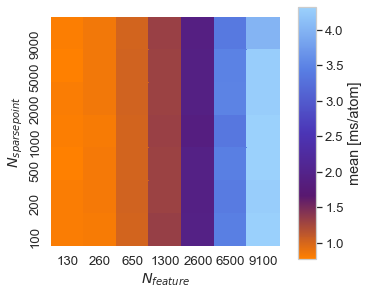

molecular_crystals pred energy


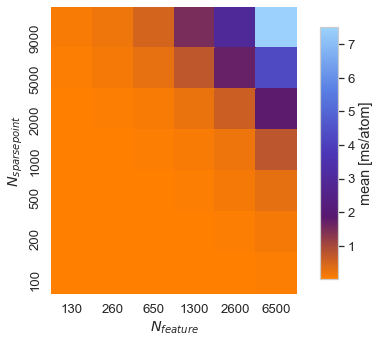

molecular_crystals pred forces


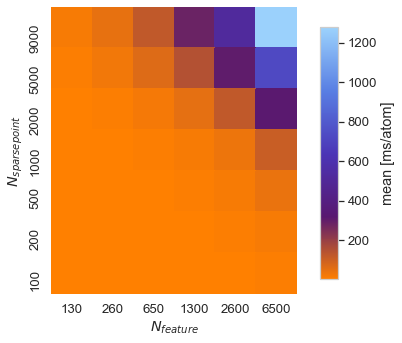

molecular_crystals rep with grad


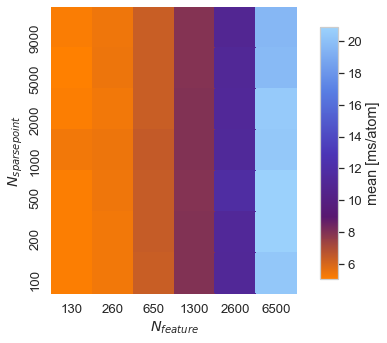

qm9 pred energy


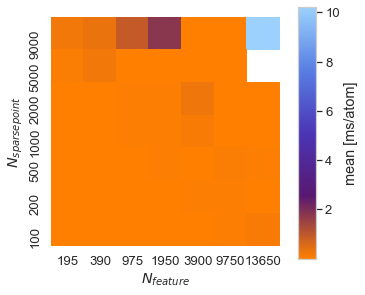

qm9 pred forces


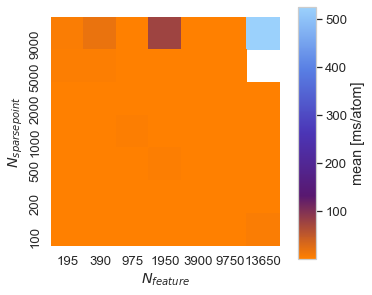

qm9 rep with grad


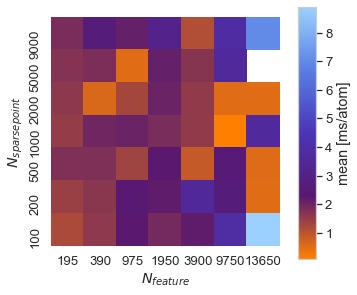

silicon_bulk pred energy


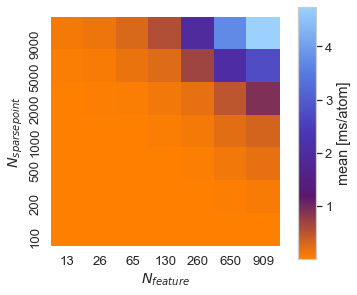

silicon_bulk pred forces


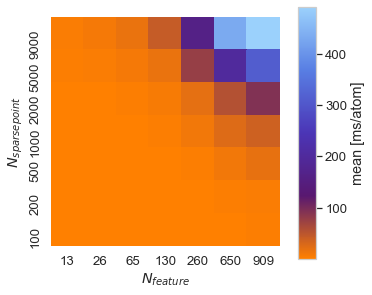

silicon_bulk rep with grad


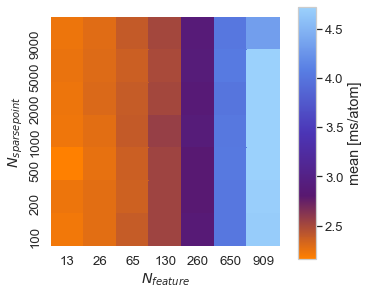

In [20]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag),df_ in df.groupby(['name','tag']):
    if tag in ['NL']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    
    plt.show()

methane_liquid pred forces


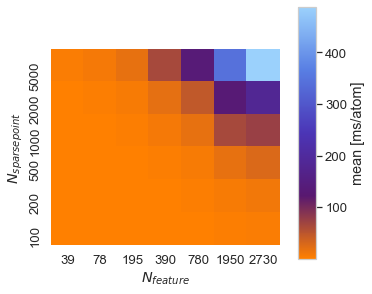

methane_sulfonic pred forces


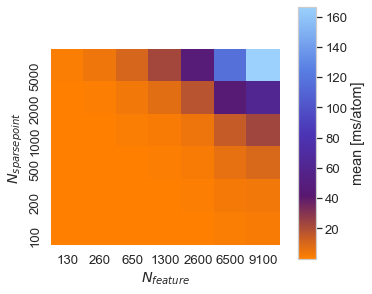

molecular_crystals pred forces


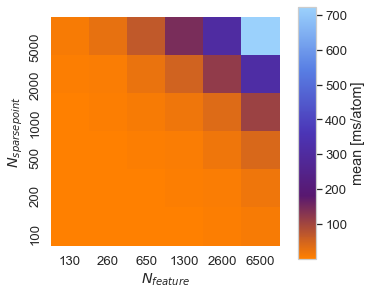

qm9 pred forces


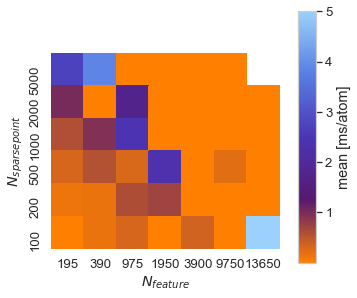

silicon_bulk pred forces


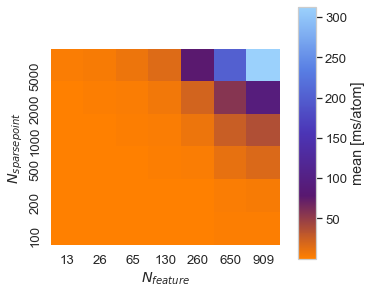

In [21]:
for (name,tag),df_ in df[df['$N_{sparse point}$'] <9000].groupby(['name','tag']):
    if tag not in ['pred forces']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

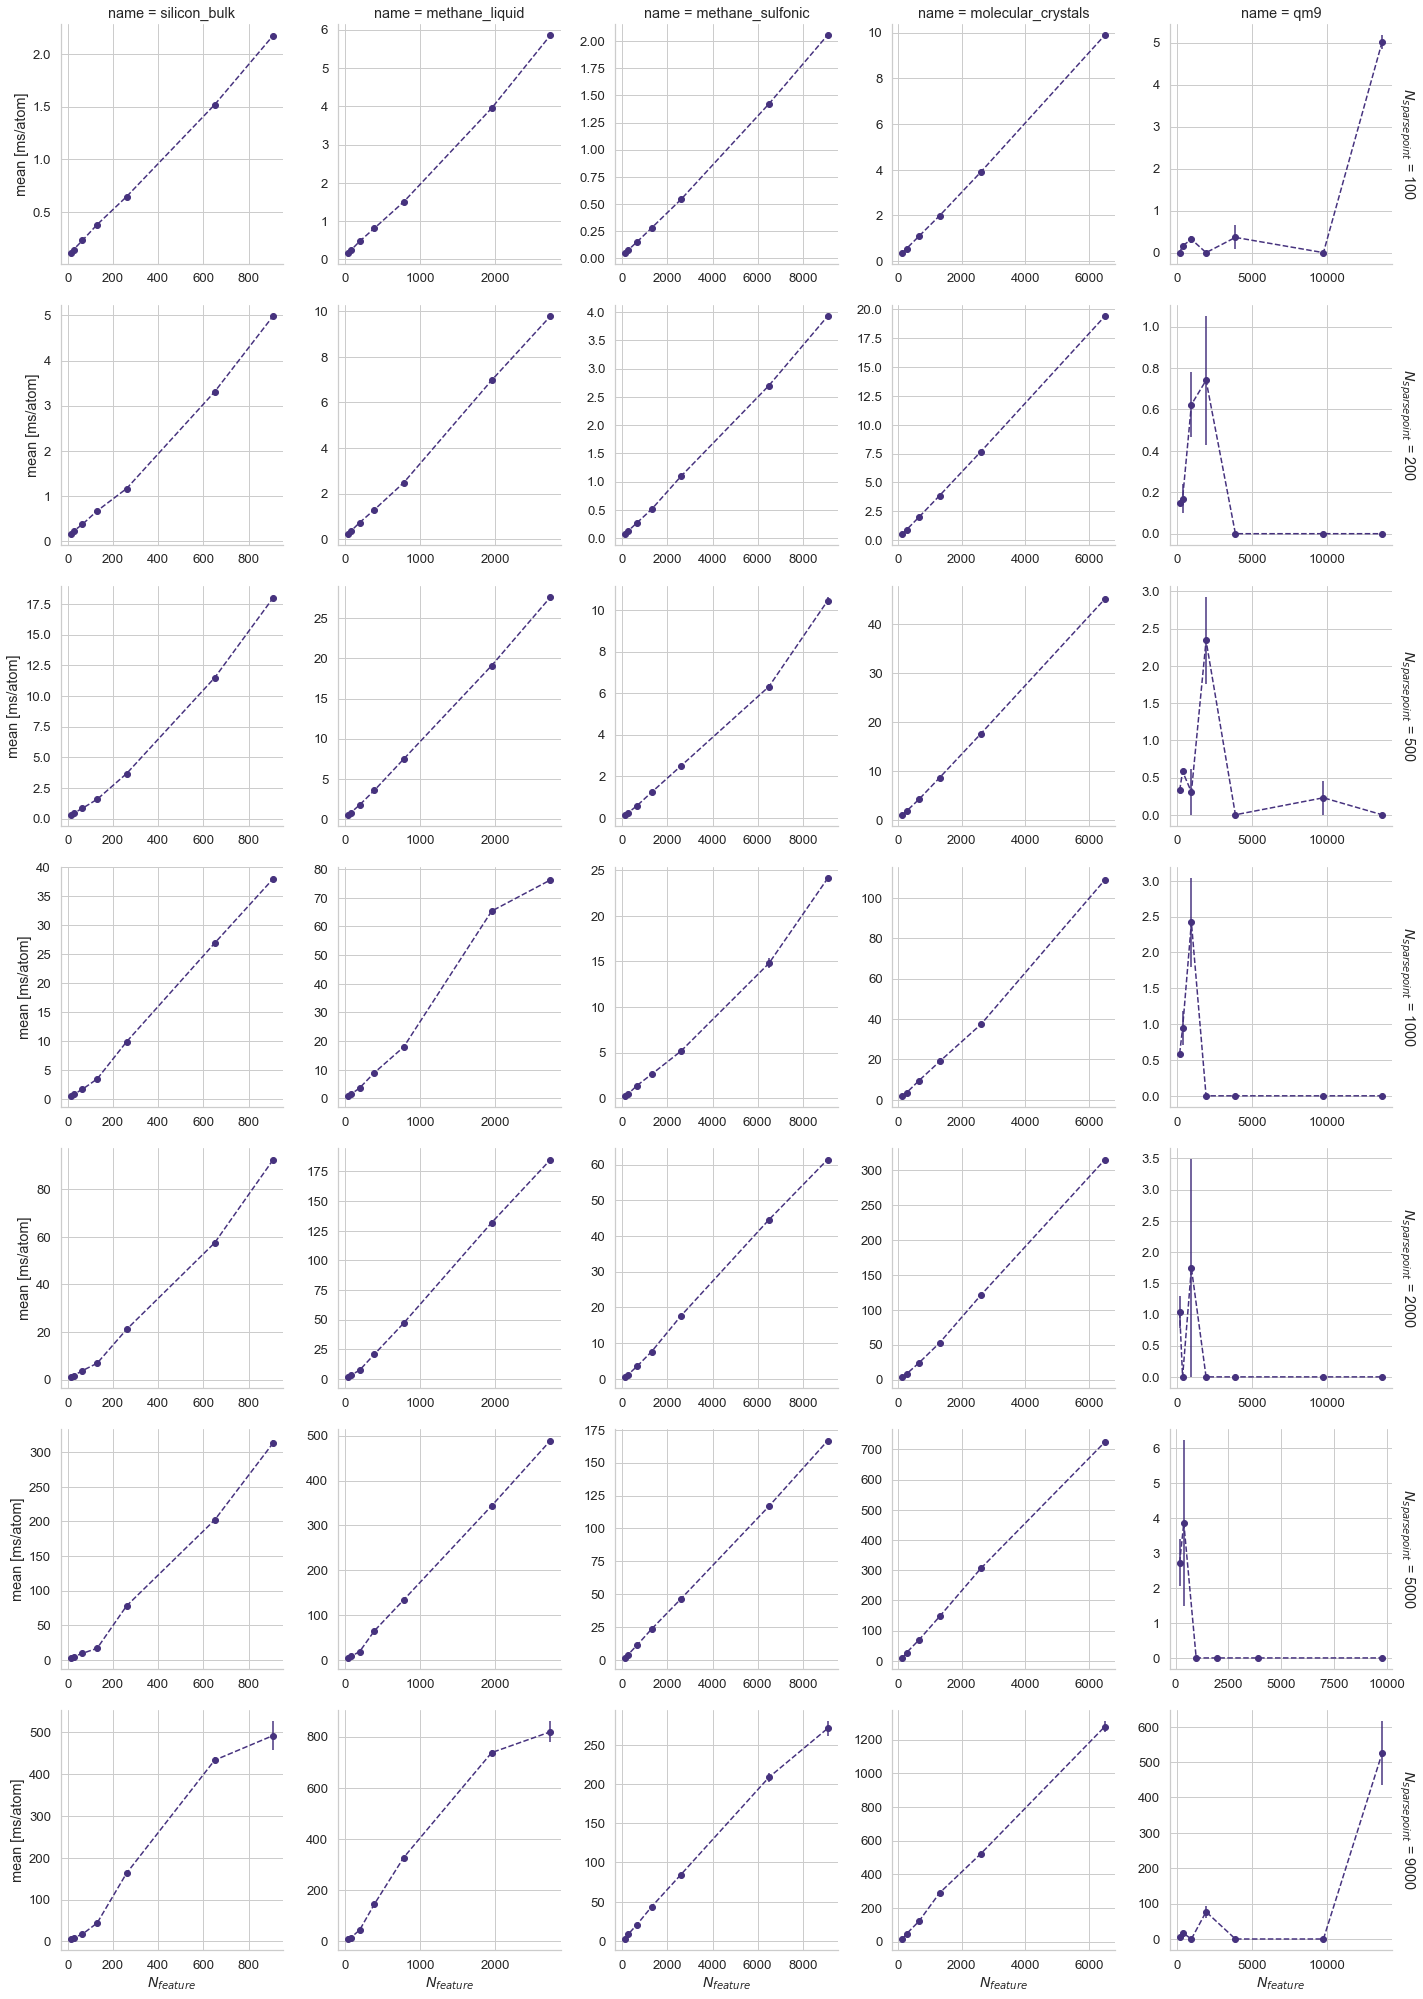

In [22]:
def plot_error(df, x, y, err , row, col, hue, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, hue=hue, height=4, **kwargs)
    g.map(plt.errorbar, x, y, err, marker="o", linestyle='--')
    return g
kwargs = dict(sharex=False, sharey=False, margin_titles=True)

aa = df[df['tag'] == 'pred forces'].sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

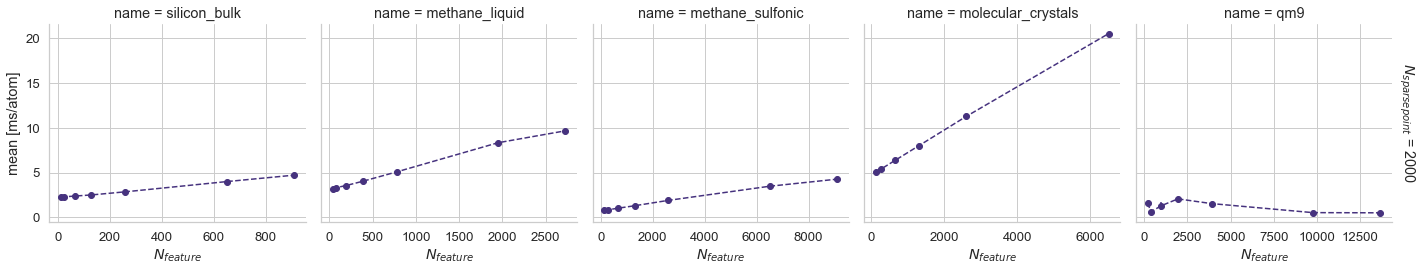

In [31]:
kwargs = dict(sharex=False, sharey=True, margin_titles=True)

aa = df.query("tag=='rep with grad' & `$N_{sparse point}$`==2000").sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

In [ ]:
aa = df.query("tag=='rep with grad' & `$N_{sparse point}$`==2000").sort_values('$N_{feature}$')


methane_liquid


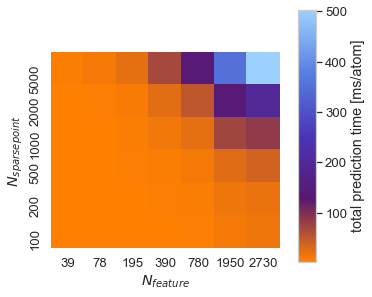

methane_sulfonic


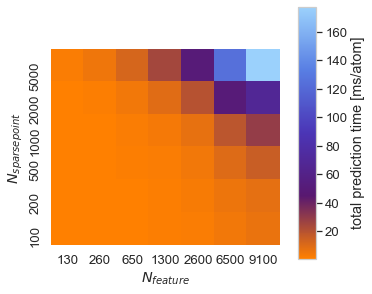

molecular_crystals


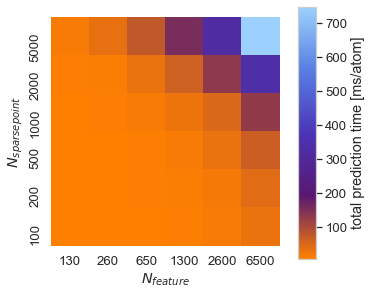

qm9


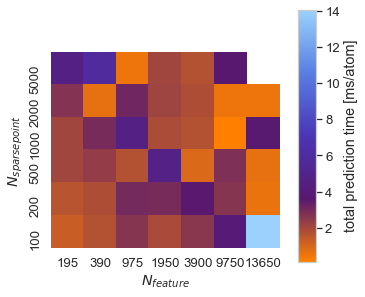

silicon_bulk


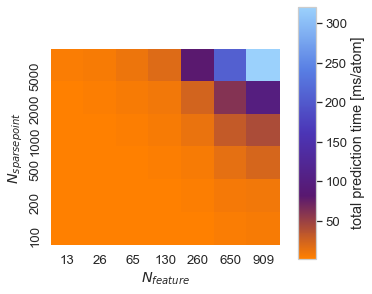

In [72]:
dd = df[df['$N_{sparse point}$'] <9000].groupby(['name','$N_{feature}$','$N_{sparse point}$']).agg(
    total=('mean [ms/atom]', np.sum)
).reset_index()
dd=dd.rename(columns={'total':'total prediction time [ms/atom]'})
for name, df_ in dd.groupby('name'):
    print(name)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='total prediction time [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

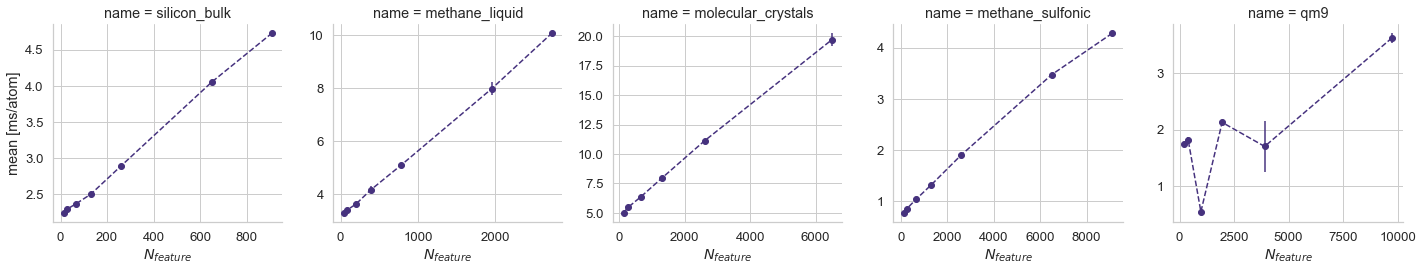

In [111]:
aa = df[df['tag'] == 'rep with grad'].query('`$N_{sparse point}$` == 5000').sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            None, 'name', None, **kwargs)

# model 4

In [14]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

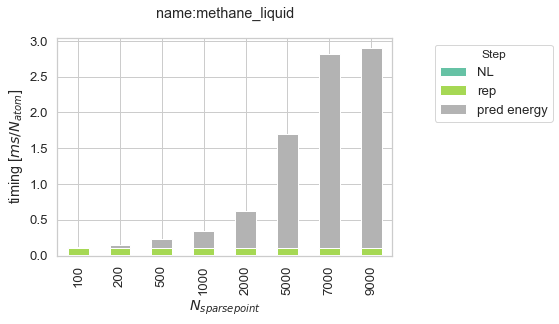

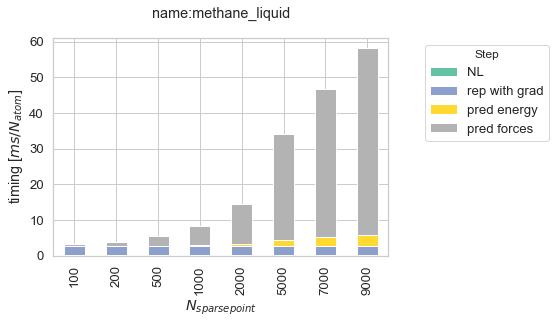

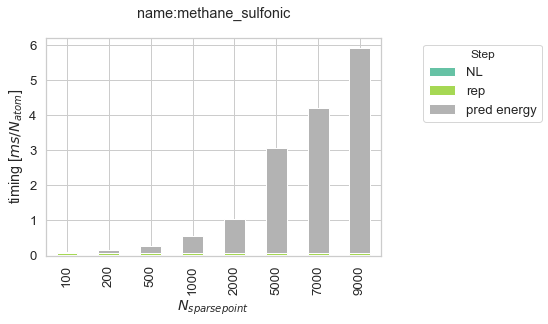

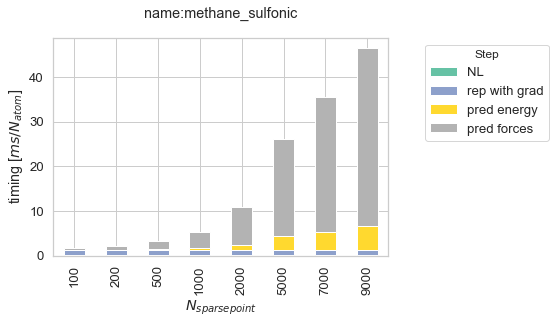

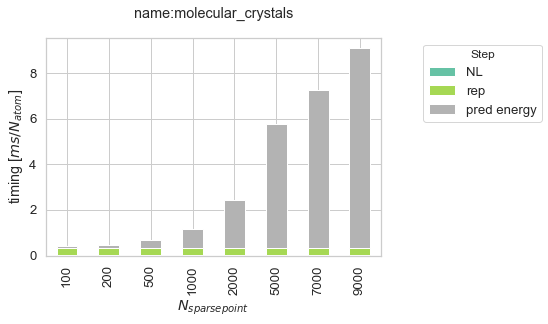

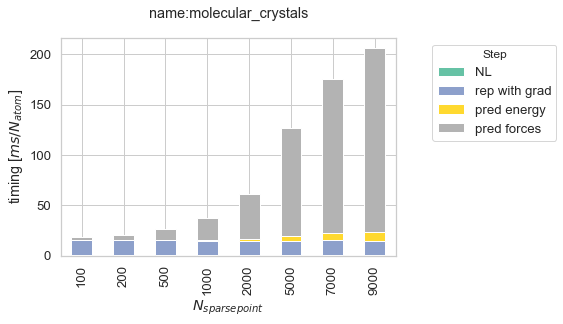

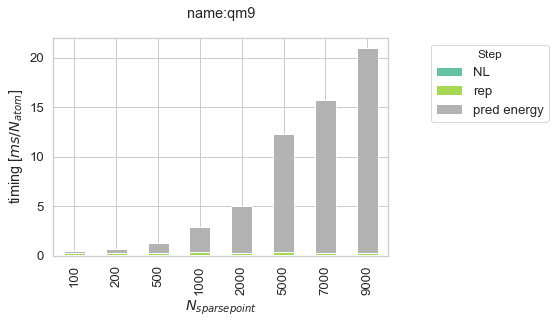

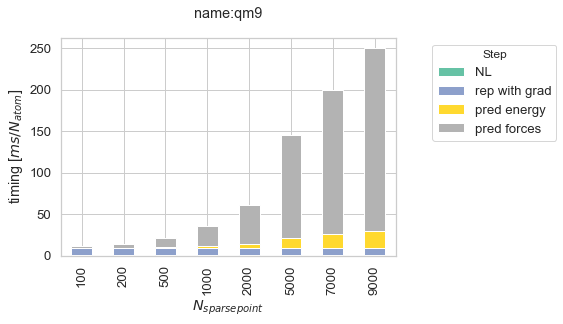

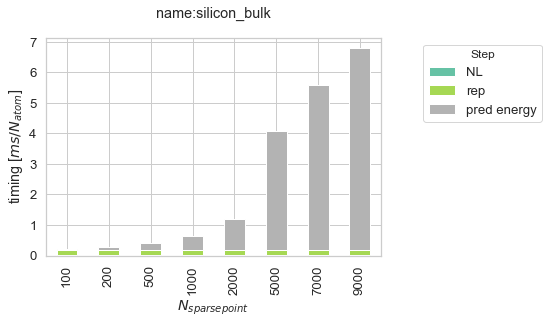

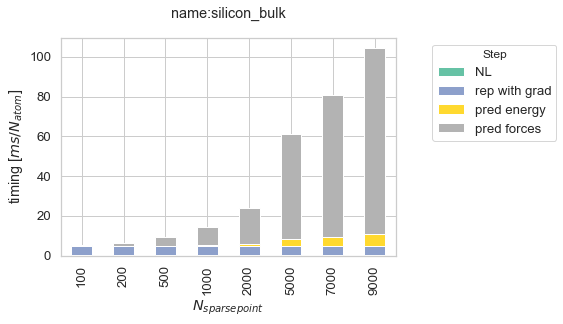

In [22]:

project = signac.get_project(fn_projects['m2'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 
       'representation.normalize':{'$eq':True},
       # 'grads_timing':{'$eq':False},
      }
aa = []
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
        
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')
    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name,grads_timing)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    # ax = plt.gca()
    # ax.yaxis.set_major_locator(MultipleLocator(10))
    # ax.yaxis.grid(True, which='minor')
    # ax.yaxis.set_minor_locator(MultipleLocator(2))
    fname = 'model-sample_sparsification-{}-{}.png'.format(name,grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
aa = []
qry = {'feature_subselection.Nselect':{'$ne':None},
       }
for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    aa.append({'name':job.sp.name, 'N':job.sp.feature_subselection.Nselect})
df = pd.DataFrame(aa)
names = df.name.unique()
aa = {}
for name in names:
    aa[name] = np.sort(df[df['name']==name].N.unique())[-1]
aa

{'methane_sulfonic': 3696,
 'molecular_crystals': 6660,
 'silicon_bulk': 715,
 'methane_liquid': 952,
 'qm9': 18300}

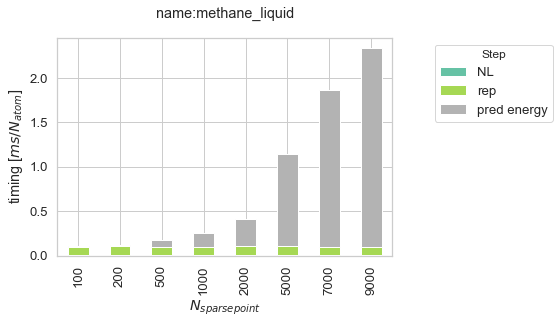

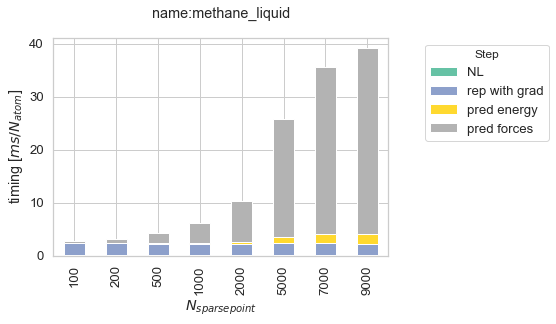

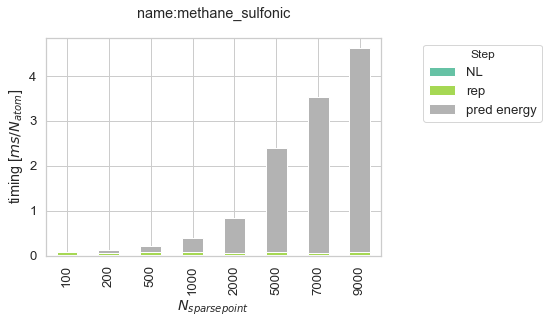

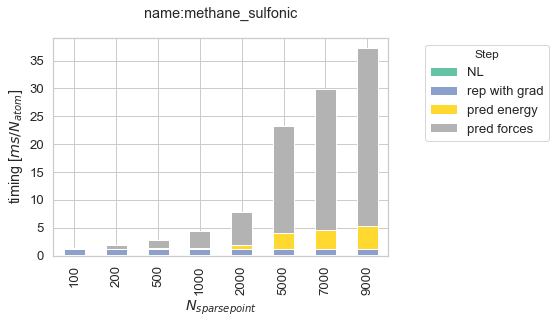

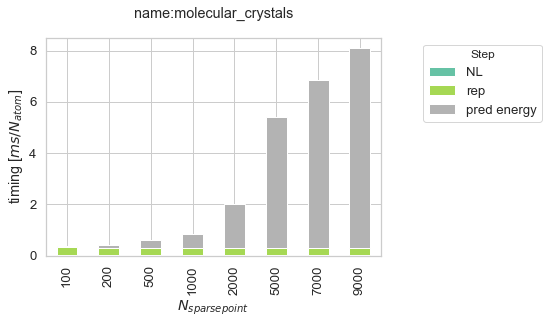

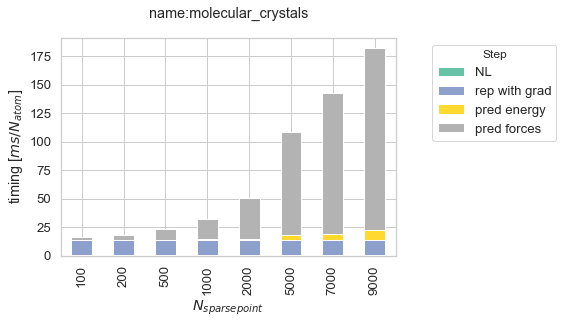

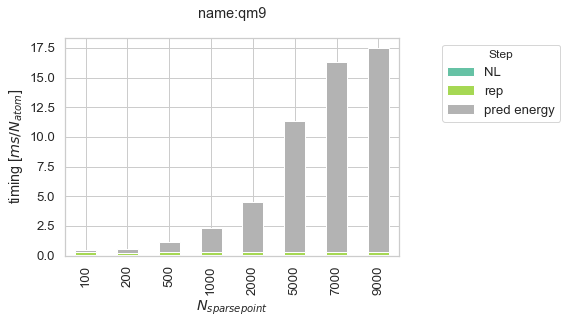

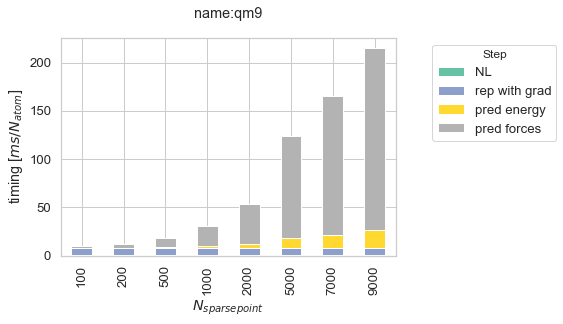

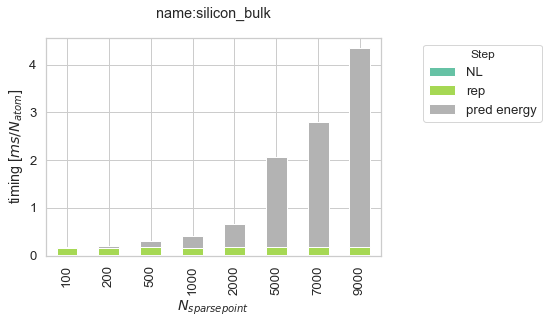

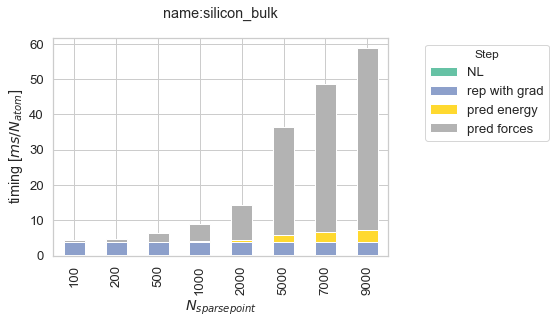

In [24]:
project = signac.get_project(fn_projects['m2'])
qry = {
    'representation.normalize':{'$eq':True},
       }
aa = []
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}
# with same nb of feat as in QUIP
select = {'methane_sulfonic': 3696,
 'molecular_crystals': 6660,
 'silicon_bulk': 715,
 'methane_liquid': 952,
 'qm9': 18300}
for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    if select[job.sp.name] != job.sp.feature_subselection.Nselect:
        continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join(['name:{}'.format(name)])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    fname = 'model-sample_sparsification-{}-n_feat_{}-{}.png'.format(name,select[name],grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [23]:
def n_feat(n,l,nsp):
    nn = n*nsp
    n_lin = nn*(nn+1)/2
    return int(l*n_lin)
print('methane_sulfonic',n_feat(8,6+1,4))
print('methane_liquid',n_feat(8,6+1,2))
print('molecular_crystals',n_feat(9,9+1,4))
print('silicon_bulk',n_feat(10,12+1,1))

methane_sulfonic 3696
methane_liquid 952
molecular_crystals 6660
silicon_bulk 715


In [53]:
aa= []
for job in project.find_jobs():
    if len(job.document) == 0: continue
    # print(job.sp.name, np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
    aa.append(np.sum(list(job.sp.sparse_point_subselection.Nselect.values())))
np.unique(aa)

array([ 100,  200,  500, 1000, 2000, 5000])

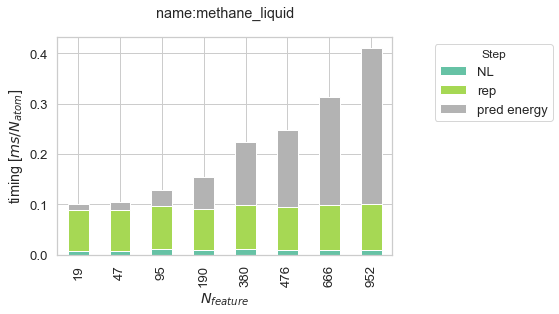

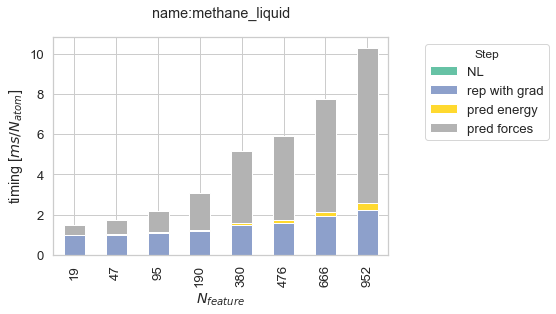

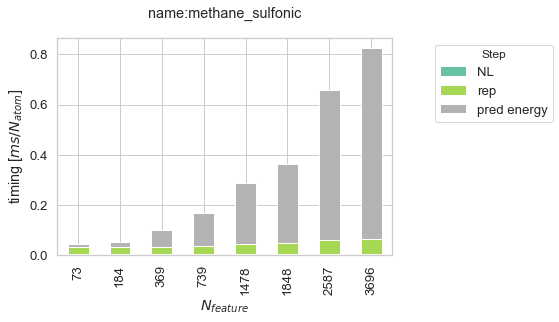

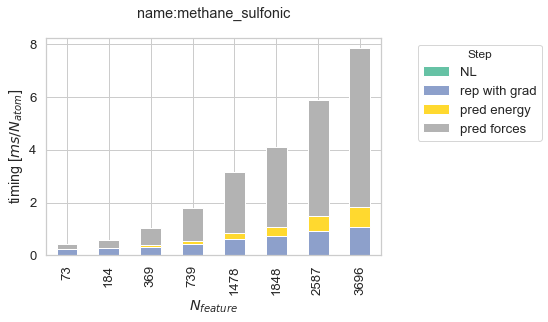

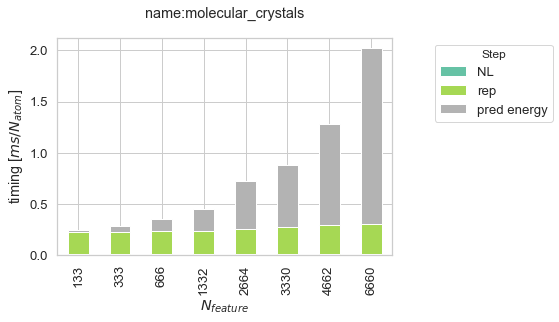

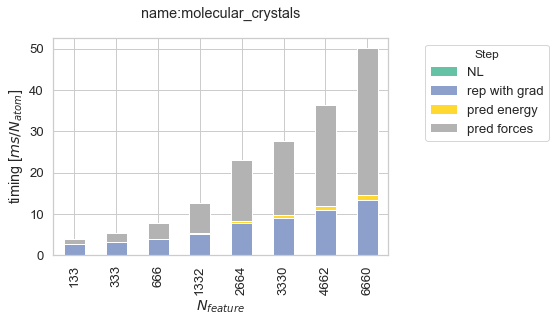

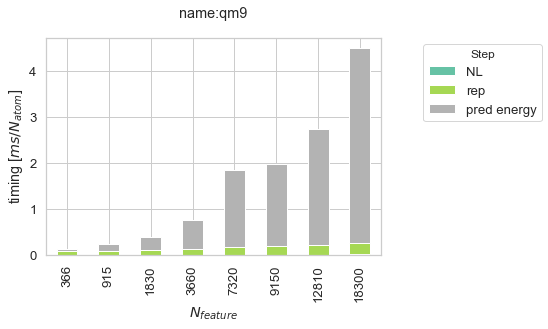

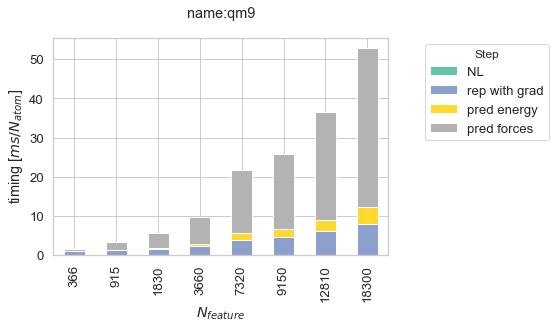

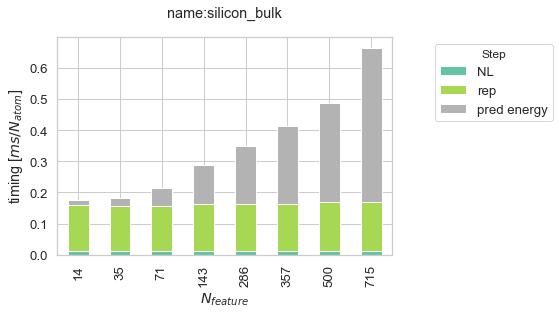

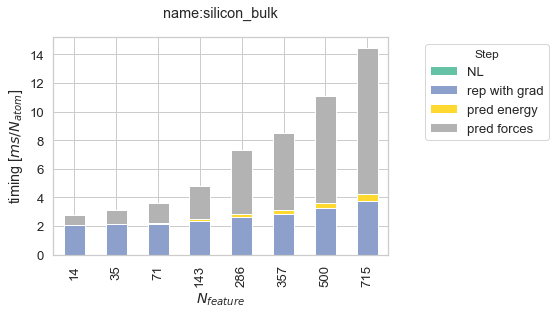

In [23]:
project = signac.get_project(fn_projects['m2'])
qry = {'representation.normalize':{'$eq':True}, 
       'feature_subselection.Nselect':{'$ne':None},
       # 'grads_timing':{'$eq':False},
      }
aa = []
n_sparse = 2000
order = {True:['NL', 'rep with grad', 'pred energy', 'pred forces'],
        False:['NL', 'rep', 'pred energy']}

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    if np.sum(list(job.sp.sparse_point_subselection.Nselect.values())) != n_sparse:
        continue
        
    # print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']
for (name,grads_timing), df_ in df.groupby(['name','grads_timing']):
    df2 = df_.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

    df2.reindex(columns=order[grads_timing]).plot(kind='bar', stacked=True, colormap="Set2")
    title = ' / '.join([k+':'+str(df_.iloc[0][k]) for k in title_values])
    plt.title(title,pad=20)
    plt.ylabel('timing [$ms/N_{atom}$]')
    plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1))
    # plt.yscale('log')
    fname = 'model-feature_sparsification-{}-n_sparse_{}-{}.png'.format(name,n_sparse,grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

In [26]:
def plot_bar(df, title, x, y, yerr , row, col, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, height=5, **kwargs)
    g.map_dataframe(draw_bar, x, y, yerr, title)
    return g
def draw_bar(*args, **kwargs):
    data = kwargs.pop('data')
    data.plot(kind='bar', x=args[0], y=args[1], yerr=args[2],title=args[3], logy=True, ax=plt.gca())

In [25]:
project = signac.get_project(fn_projects['m2'])
qry = {
    'feature_subselection.Nselect':{'$ne':None},
       # 'grads_timing':{'$eq':True},
      }
aa = []

for job in project.find_jobs(qry):
    if len(job.document) == 0: continue
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = int(job.sp.feature_subselection.Nselect)
        v['$N_{sparse point}$'] = np.sum(list(job.sp.sparse_point_subselection.Nselect.values()))
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
        v['grads_timing'] = job.sp.grads_timing
    aa.extend(ee)
df = pd.DataFrame(aa)
    

In [20]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)

for name,d in df.groupby('name'):
    print(name)
    plot_bar(d, x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name,
             col='$N_{sparse point}$',row='$N_{feature}$')
    plt.show()

methane_liquid


NameError: name 'plot_bar' is not defined

In [27]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
def plot_contour(df, x, y, values , row, col, **kwargs):
    vmin=df[values].min()
    vmax=df[values].max()
    g = sns.FacetGrid(df, col=col, row=row, height=6, **kwargs)
    g.map_dataframe(draw_heatmap, x, y, values, cmap=cmap, square=True, cbar=False,
                    vmin=vmin, vmax=vmax)
    # g.map(sns.heatmap, x, y, values, cmap=cmap, square=True, cbar_kws={'label': values})
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.25, 1))
    fig = g.fig
    fig.tight_layout(h_pad=1.5, w_pad=1.5)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.7])
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label= values)
    return g
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.sort_index('index',ascending=False) 
    sns.heatmap(d, **kwargs)

methane_liquid pred energy


ValueError: Index contains duplicate entries, cannot reshape

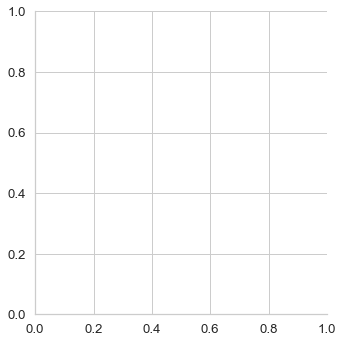

In [22]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag,grads_timing),df_ in df.groupby(['name','tag','grads_timing']):
    if tag in ['NL']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    fname = 'model-feat_vs_sp-{}-{}-{}.png'.format(name,tag.replace(' ','_'),grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

methane_liquid pred forces


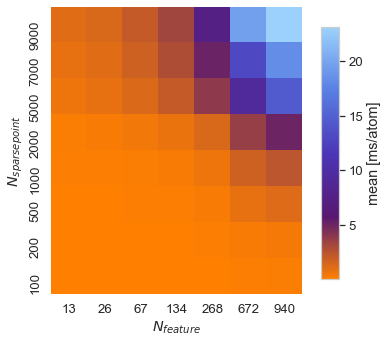

methane_sulfonic pred forces


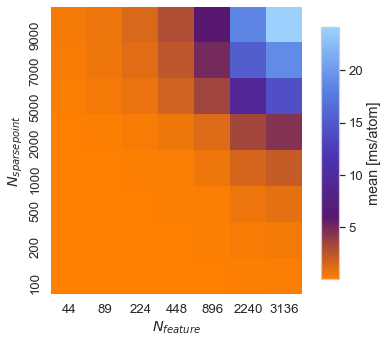

molecular_crystals pred forces


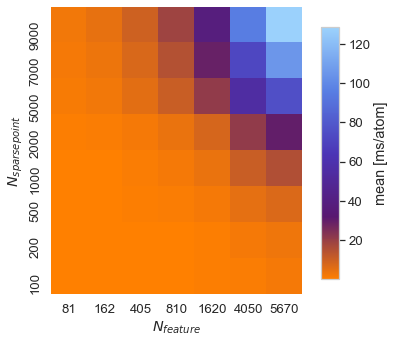

qm9 pred forces


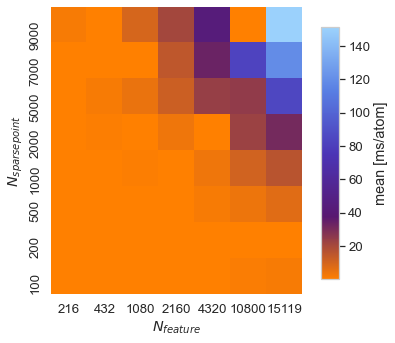

silicon_bulk pred forces


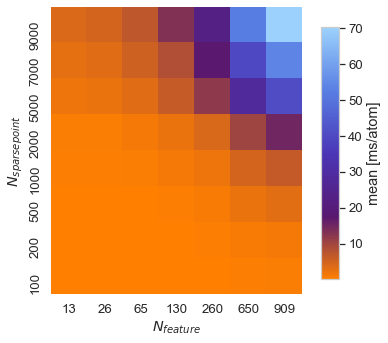

In [25]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
for (name,tag),df_ in df.groupby(['name','tag']):
    if tag not in ['pred forces']:
        continue
    print(name, tag)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='mean [ms/atom]' , 
                 row=None, col=None, **kwargs)
    plt.show()

methane_liquid


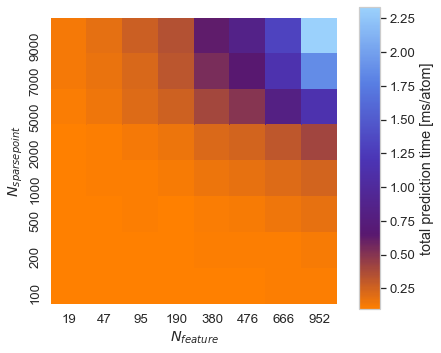

methane_liquid


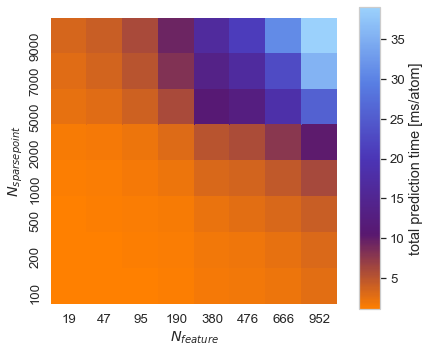

methane_sulfonic


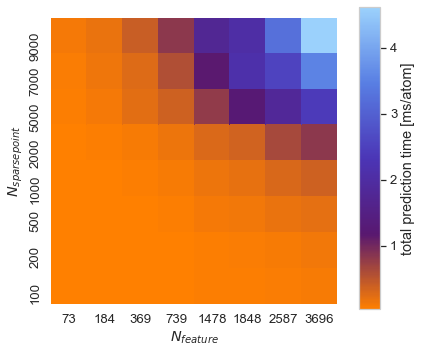

methane_sulfonic


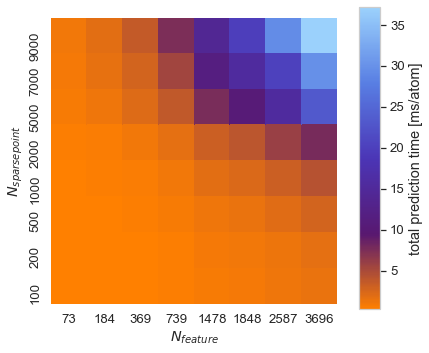

molecular_crystals


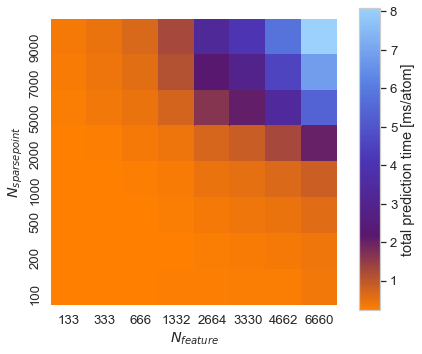

molecular_crystals


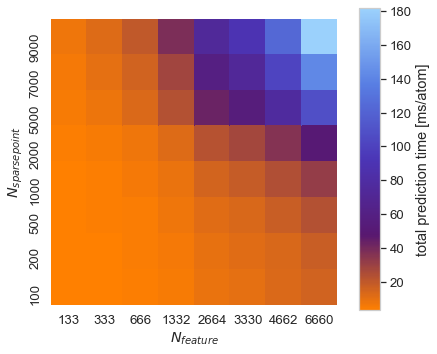

qm9


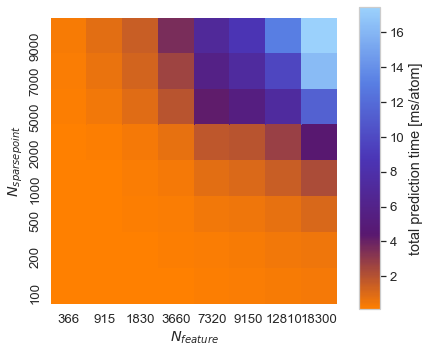

qm9


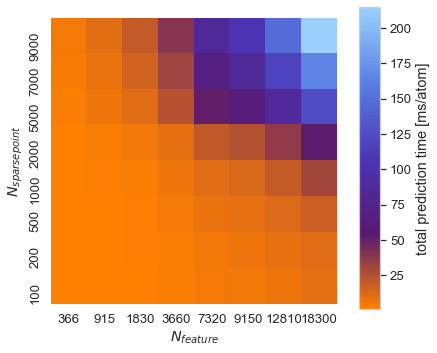

silicon_bulk


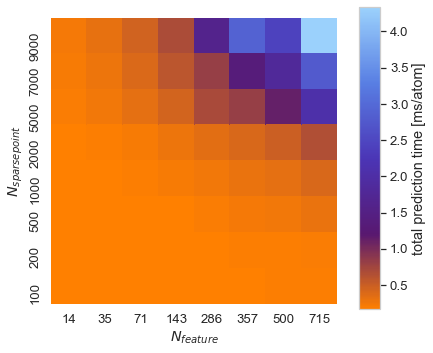

silicon_bulk


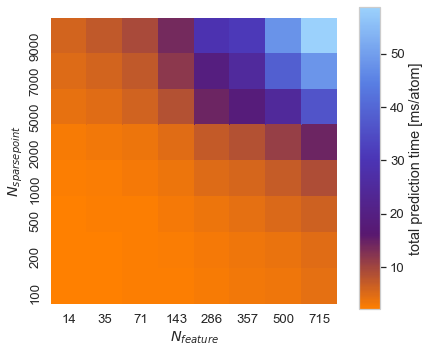

In [29]:
kwargs = dict(sharex=True, sharey=True, margin_titles=True)
dd = df.groupby(['name','grads_timing','$N_{feature}$','$N_{sparse point}$']).agg(
    total=('mean [ms/atom]', np.sum)
).reset_index()
dd=dd.rename(columns={'total':'total prediction time [ms/atom]'})
for (name,grads_timing), df_ in dd.groupby(['name','grads_timing']):
    print(name)
    plot_contour(df_, x='$N_{feature}$', y='$N_{sparse point}$', values='total prediction time [ms/atom]' , 
                 row=None, col=None, **kwargs)
    fname = 'model-feat_vs_sp-{}-{}-total.png'.format(name,grads_timing)
    plt.savefig(fpfx+fname, dpi=300, bbox_inches='tight')
    plt.show()

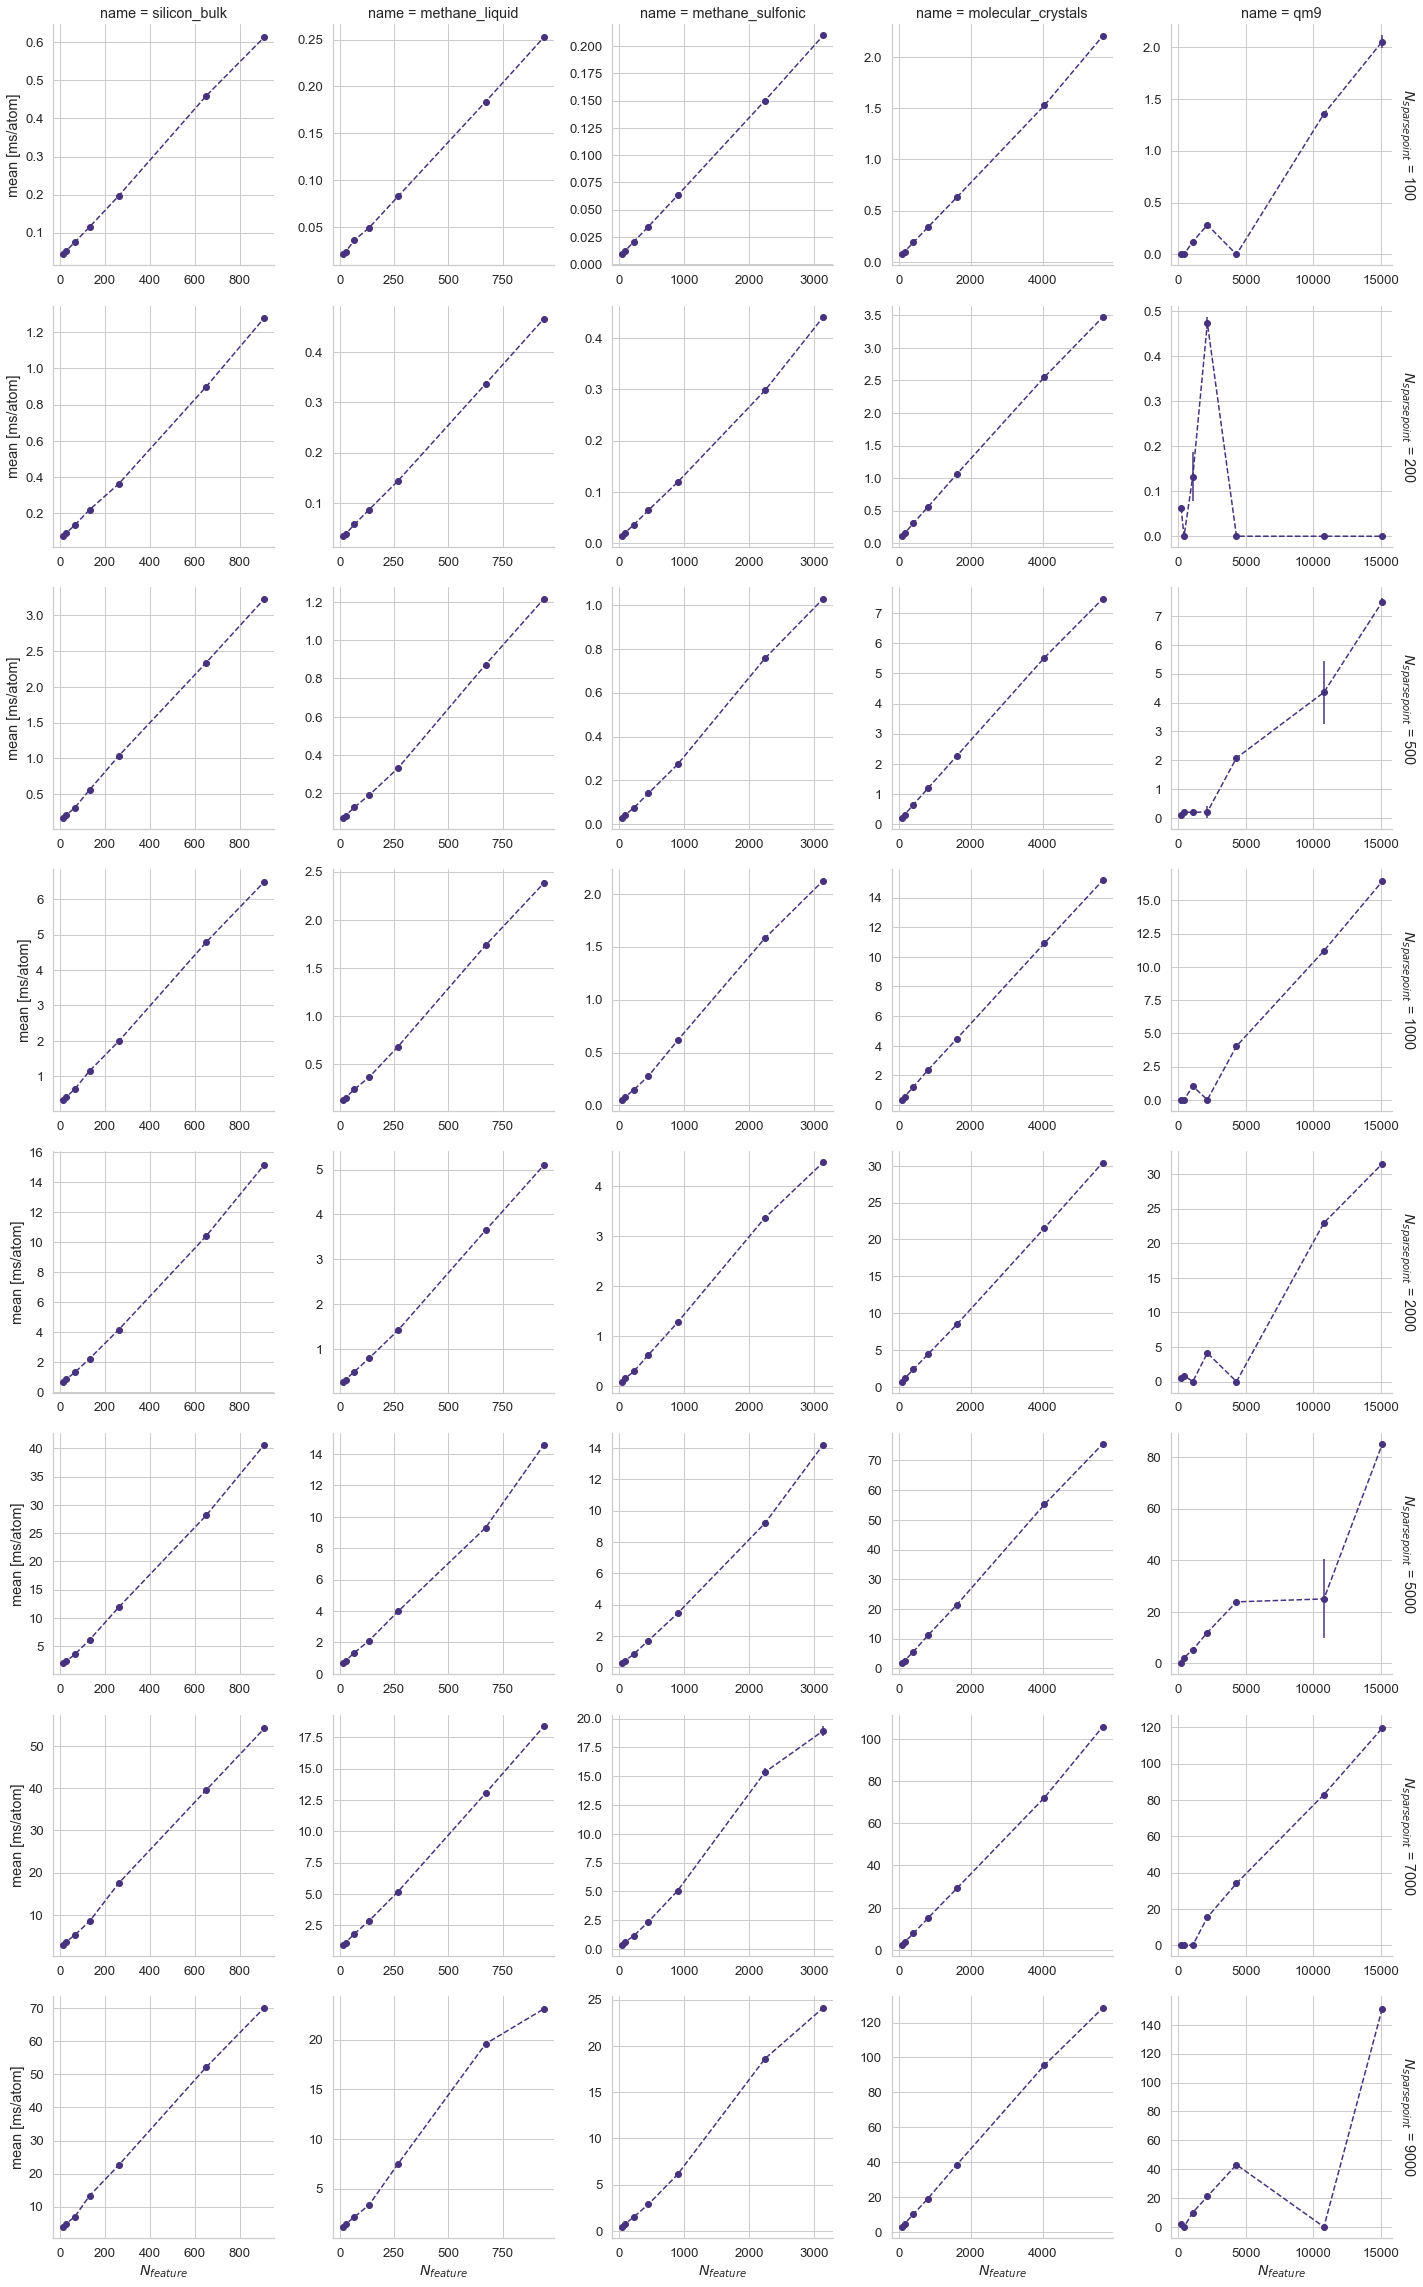

In [27]:
def plot_error(df, x, y, err , row, col, hue, **kwargs):
    g = sns.FacetGrid(df, col=col, row=row, hue=hue, height=4, **kwargs)
    g.map(plt.errorbar, x, y, err, marker="o", linestyle='--')
    # plt.legend(title=hue,loc='upper right', bbox_to_anchor=(1.35, 1))
    # for ax in g.axes.flatten():
    #     ax.set_xscale('log')
    #     ax.set_yscale('log')
    return g
kwargs = dict(sharex=False, sharey=False, margin_titles=True)

aa = df[df['tag'] == 'pred forces'].sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            '$N_{sparse point}$', 'name', None, **kwargs)

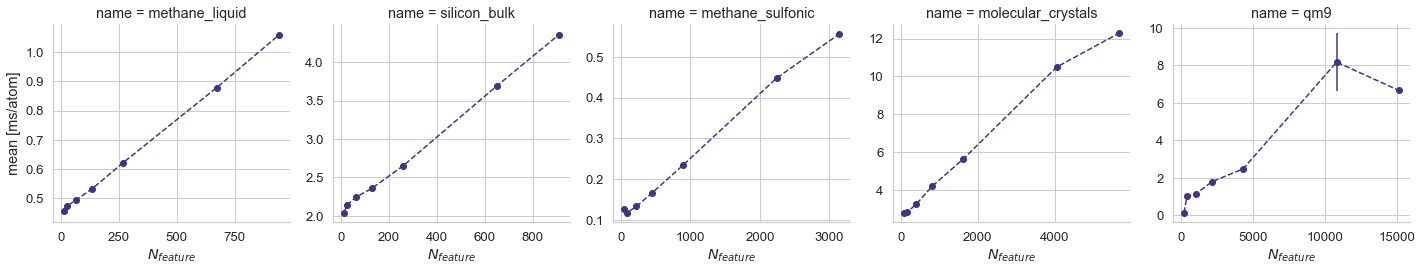

In [28]:
aa = df[df['tag'] == 'rep with grad'].query('`$N_{sparse point}$` == 5000').sort_values('$N_{feature}$')
plot_error(aa, '$N_{feature}$', 'mean [ms/atom]', 'std [ms/atom]', 
            None, 'name', None, **kwargs)